In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, plot_confusion_matrix,cohen_kappa_score,log_loss
from sklearn.model_selection import GridSearchCV

from imblearn.over_sampling import SMOTE

%matplotlib inline

In [3]:
from sklearn.neighbors import KNeighborsClassifier

In [4]:
import mlxtend
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [5]:
from sklearn.feature_selection import RFE

In [6]:
from sklearn.preprocessing import PowerTransformer

In [7]:
from sklearn.naive_bayes import GaussianNB

In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [11]:
from scipy.stats import ttest_ind

In [12]:
from matplotlib.colors import ListedColormap

In [13]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [14]:
xtrain = pd.read_csv('xtrain_ekdum_final.csv')
xtest = pd.read_csv('xtest_ekdum_final.csv')
ytrain = pd.read_csv('yeh_le_ytrain.csv')
ytest = pd.read_csv('yeh_le_ytest.csv')

In [15]:
xtrain.shape

(52270, 37)

In [16]:
xtest.shape

(13068, 37)

In [17]:
ytrain.shape

(52270, 1)

In [18]:
ytest.shape

(13068, 1)

In [19]:
xtrain.head()

,Gender,Contacted,Primary_Bank_Type,City_Category_B,City_Category_C,Employer_Category1_B,Employer_Category1_C,Source_Category_B,Source_Category_C,Source_Category_D,Source_Category_E,Source_Category_F,Source_Category_G,Age_Cat_Middle-Aged,Age_Cat_Old,Age_Cat_Young,Employer_Cat3_MSF,Employer_Cat3_MSME,Employer_Cat3_PVT,Employer_Cat3_VSF,Employer_Category2,Var1,Lead_Creation_Month,City_Code,Source,Monthly_Income,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,loan_period_months,emi_recal,EMI-Monthly_Income_Ratio,Income_loan_Ratio,IR_15-20,IR_20-25,IR_25+
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,4,0,7,0.148588,0.059791,1680.0,0.0,19600,3.4,18.040,40.8,646,0.384524,0.879263,1,0,0
1,1,1,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,4,2,5,-0.267721,0.059791,1350.0,0.0,30000,5.0,20.000,60.0,795,0.588889,1.597424,1,0,0
2,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,1,10,7,0.148588,0.059791,5200.0,0.0,90000,4.4,15.108,52.8,2344,0.450769,1.266409,1,0,0
3,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,4,0,12,-0.267721,-0.279869,1500.0,0.0,22000,4.0,35.500,48.0,864,0.576000,1.085929,0,0,1
4,1,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,4,2,7,0.034822,0.059791,1500.0,600.0,11000,5.0,20.000,60.0,291,0.594000,0.527150,1,0,0


In [20]:
def q(x) :
    if x < 4 :
        return('Q2')
    elif (x>=4) & (x<7) :
        return('Q3')
    elif (x>=7) & (x<10) :
        return('Q4')
    else :
        return('Q1')

In [21]:
xtrain['Lead_Quarter'] = xtrain.Lead_Creation_Month.map(q)
xtrain.head()

,Gender,Contacted,Primary_Bank_Type,City_Category_B,City_Category_C,Employer_Category1_B,Employer_Category1_C,Source_Category_B,Source_Category_C,Source_Category_D,Source_Category_E,Source_Category_F,Source_Category_G,Age_Cat_Middle-Aged,Age_Cat_Old,Age_Cat_Young,Employer_Cat3_MSF,Employer_Cat3_MSME,Employer_Cat3_PVT,Employer_Cat3_VSF,Employer_Category2,Var1,Lead_Creation_Month,City_Code,Source,Monthly_Income,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,loan_period_months,emi_recal,EMI-Monthly_Income_Ratio,Income_loan_Ratio,IR_15-20,IR_20-25,IR_25+,Lead_Quarter
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,4,0,7,0.148588,0.059791,1680.0,0.0,19600,3.4,18.040,40.8,646,0.384524,0.879263,1,0,0,Q4
1,1,1,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,4,2,5,-0.267721,0.059791,1350.0,0.0,30000,5.0,20.000,60.0,795,0.588889,1.597424,1,0,0,Q3
2,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,1,10,7,0.148588,0.059791,5200.0,0.0,90000,4.4,15.108,52.8,2344,0.450769,1.266409,1,0,0,Q4
3,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,4,0,12,-0.267721,-0.279869,1500.0,0.0,22000,4.0,35.500,48.0,864,0.576000,1.085929,0,0,1,Q1
4,1,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,4,2,7,0.034822,0.059791,1500.0,600.0,11000,5.0,20.000,60.0,291,0.594000,0.527150,1,0,0,Q4


In [22]:
xtrain['Loan_Period'] = np.round(xtrain.Loan_Period)
xtrain.head()

,Gender,Contacted,Primary_Bank_Type,City_Category_B,City_Category_C,Employer_Category1_B,Employer_Category1_C,Source_Category_B,Source_Category_C,Source_Category_D,Source_Category_E,Source_Category_F,Source_Category_G,Age_Cat_Middle-Aged,Age_Cat_Old,Age_Cat_Young,Employer_Cat3_MSF,Employer_Cat3_MSME,Employer_Cat3_PVT,Employer_Cat3_VSF,Employer_Category2,Var1,Lead_Creation_Month,City_Code,Source,Monthly_Income,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,loan_period_months,emi_recal,EMI-Monthly_Income_Ratio,Income_loan_Ratio,IR_15-20,IR_20-25,IR_25+,Lead_Quarter
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,4,0,7,0.148588,0.059791,1680.0,0.0,19600,3.0,18.040,40.8,646,0.384524,0.879263,1,0,0,Q4
1,1,1,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,4,2,5,-0.267721,0.059791,1350.0,0.0,30000,5.0,20.000,60.0,795,0.588889,1.597424,1,0,0,Q3
2,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,1,10,7,0.148588,0.059791,5200.0,0.0,90000,4.0,15.108,52.8,2344,0.450769,1.266409,1,0,0,Q4
3,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,4,0,12,-0.267721,-0.279869,1500.0,0.0,22000,4.0,35.500,48.0,864,0.576000,1.085929,0,0,1,Q1
4,1,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,4,2,7,0.034822,0.059791,1500.0,600.0,11000,5.0,20.000,60.0,291,0.594000,0.527150,1,0,0,Q4


In [23]:
xtest.head()

,Gender,Contacted,Primary_Bank_Type,City_Category_B,City_Category_C,Employer_Category1_B,Employer_Category1_C,Source_Category_B,Source_Category_C,Source_Category_D,Source_Category_E,Source_Category_F,Source_Category_G,Age_Cat_Middle-Aged,Age_Cat_Old,Age_Cat_Young,Employer_Cat3_MSF,Employer_Cat3_MSME,Employer_Cat3_PVT,Employer_Cat3_VSF,Employer_Category2,Var1,Lead_Creation_Month,City_Code,Source,Monthly_Income,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,loan_period_months,emi_recal,EMI-Monthly_Income_Ratio,Income_loan_Ratio,IR_15-20,IR_20-25,IR_25+
0,1,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,4,7,7,0.034822,0.059791,3550.0,0.0,57000,5.0,14.264,60.0,1334,0.375775,1.154195,0,0,0
1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,4,0,8,0.148588,0.059791,1000.0,0.0,27000,4.8,18.950,57.6,717,0.717000,1.952378,1,0,0
2,1,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,4,10,4,0.034822,-0.279869,8000.0,0.0,139000,5.0,14.850,60.0,3296,0.412000,1.248986,0,0,0
3,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,4,7,12,-0.267721,0.059791,2800.0,900.0,10000,2.0,20.000,24.0,509,0.503214,0.280534,1,0,0
4,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,4,0,8,-0.267721,0.059791,2625.0,1000.0,18600,4.0,20.800,48.0,574,0.599619,0.524630,0,1,0


In [24]:
xtest['Lead_Quarter'] = xtest.Lead_Creation_Month.map(q)

In [25]:
xtest['Loan_Period'] = np.round(xtest.Loan_Period)
xtest.head()

,Gender,Contacted,Primary_Bank_Type,City_Category_B,City_Category_C,Employer_Category1_B,Employer_Category1_C,Source_Category_B,Source_Category_C,Source_Category_D,Source_Category_E,Source_Category_F,Source_Category_G,Age_Cat_Middle-Aged,Age_Cat_Old,Age_Cat_Young,Employer_Cat3_MSF,Employer_Cat3_MSME,Employer_Cat3_PVT,Employer_Cat3_VSF,Employer_Category2,Var1,Lead_Creation_Month,City_Code,Source,Monthly_Income,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,loan_period_months,emi_recal,EMI-Monthly_Income_Ratio,Income_loan_Ratio,IR_15-20,IR_20-25,IR_25+,Lead_Quarter
0,1,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,4,7,7,0.034822,0.059791,3550.0,0.0,57000,5.0,14.264,60.0,1334,0.375775,1.154195,0,0,0,Q4
1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,4,0,8,0.148588,0.059791,1000.0,0.0,27000,5.0,18.950,57.6,717,0.717000,1.952378,1,0,0,Q4
2,1,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,4,10,4,0.034822,-0.279869,8000.0,0.0,139000,5.0,14.850,60.0,3296,0.412000,1.248986,0,0,0,Q3
3,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,4,7,12,-0.267721,0.059791,2800.0,900.0,10000,2.0,20.000,24.0,509,0.503214,0.280534,1,0,0,Q1
4,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,4,0,8,-0.267721,0.059791,2625.0,1000.0,18600,4.0,20.800,48.0,574,0.599619,0.524630,0,1,0,Q4


In [26]:
ytrain.head()

,Approved
0,0
1,0
2,0
3,0
4,0


In [27]:
ytest.head()

,Approved
0,0
1,0
2,0
3,0
4,0


In [28]:
ytr = ytrain.Approved
yte = ytest.Approved

In [29]:
data = pd.read_csv('train.csv')
y = data.Approved

#### Performing statistical test to verify that the split train and test sets are representative of the initial data

In [30]:
##Ho - No change in distribution after train test split
## Ha - Ho is false
## Level of Significance - 5%

ttest_ind(ytrain,y)

Ttest_indResult(statistic=array([1.33728766]), pvalue=array([0.18113125]))

In [31]:
ttest_ind(ytest,y)

Ttest_indResult(statistic=array([0.65237023]), pvalue=array([0.51416418]))

In [32]:
## Since p-value is greater than our level of significance, we fail to reject Ho
## Thus, our split sets are representative of the main dataset.

### SMOTE (Imbalanced Dataset)

In [33]:
(data.Approved.value_counts()/data.shape[0])*100    ## Highly imbalanced ditribution

## Need to oversample the minority class

0    98.536858
1     1.463142
Name: Approved, dtype: float64

### Dummy Encoding the new feature Lead_Quarter

In [34]:
xtrain.columns

Index(['Gender', 'Contacted', 'Primary_Bank_Type', 'City_Category_B',
       'City_Category_C', 'Employer_Category1_B', 'Employer_Category1_C',
       'Source_Category_B', 'Source_Category_C', 'Source_Category_D',
       'Source_Category_E', 'Source_Category_F', 'Source_Category_G',
       'Age_Cat_Middle-Aged', 'Age_Cat_Old', 'Age_Cat_Young',
       'Employer_Cat3_MSF', 'Employer_Cat3_MSME', 'Employer_Cat3_PVT',
       'Employer_Cat3_VSF', 'Employer_Category2', 'Var1',
       'Lead_Creation_Month', 'City_Code', 'Source', 'Monthly_Income',
       'Existing_EMI', 'Loan_Amount', 'Loan_Period', 'Interest_Rate',
       'loan_period_months', 'emi_recal', 'EMI-Monthly_Income_Ratio',
       'Income_loan_Ratio', 'IR_15-20', 'IR_20-25', 'IR_25+', 'Lead_Quarter'],
      dtype='object')

In [35]:
xtrain.shape

(52270, 38)

In [36]:
dum_quarter_train = pd.get_dummies(xtrain.Lead_Quarter, drop_first = True)

In [37]:
xtrain_rest = xtrain.iloc[:,:37]
xtrain_rest = xtrain_rest.reset_index(drop = True)

In [38]:
dum_quarter_test = pd.get_dummies(xtest.Lead_Quarter, drop_first = True)

In [39]:
dum_quarter_train = dum_quarter_train.reset_index(drop = True)
dum_quarter_test = dum_quarter_test.reset_index(drop = True)

In [40]:
xtest_rest = xtest.iloc[:,:37]
xtest_rest = xtest_rest.reset_index(drop = True)

In [41]:
xtrain_final = pd.concat([xtrain_rest,dum_quarter_train], axis = 1)

In [42]:
xtest_final = pd.concat([xtest_rest,dum_quarter_test], axis = 1)

In [43]:
xtrain_final.head()

,Gender,Contacted,Primary_Bank_Type,City_Category_B,City_Category_C,Employer_Category1_B,Employer_Category1_C,Source_Category_B,Source_Category_C,Source_Category_D,Source_Category_E,Source_Category_F,Source_Category_G,Age_Cat_Middle-Aged,Age_Cat_Old,Age_Cat_Young,Employer_Cat3_MSF,Employer_Cat3_MSME,Employer_Cat3_PVT,Employer_Cat3_VSF,Employer_Category2,Var1,Lead_Creation_Month,City_Code,Source,Monthly_Income,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,loan_period_months,emi_recal,EMI-Monthly_Income_Ratio,Income_loan_Ratio,IR_15-20,IR_20-25,IR_25+,Q2,Q3,Q4
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,4,0,7,0.148588,0.059791,1680.0,0.0,19600,3.0,18.040,40.8,646,0.384524,0.879263,1,0,0,0,0,1
1,1,1,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,4,2,5,-0.267721,0.059791,1350.0,0.0,30000,5.0,20.000,60.0,795,0.588889,1.597424,1,0,0,0,1,0
2,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,1,10,7,0.148588,0.059791,5200.0,0.0,90000,4.0,15.108,52.8,2344,0.450769,1.266409,1,0,0,0,0,1
3,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,4,0,12,-0.267721,-0.279869,1500.0,0.0,22000,4.0,35.500,48.0,864,0.576000,1.085929,0,0,1,0,0,0
4,1,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,4,2,7,0.034822,0.059791,1500.0,600.0,11000,5.0,20.000,60.0,291,0.594000,0.527150,1,0,0,0,0,1


In [44]:
xtrain_final.shape

(52270, 40)

In [45]:
xtest_final.head()

,Gender,Contacted,Primary_Bank_Type,City_Category_B,City_Category_C,Employer_Category1_B,Employer_Category1_C,Source_Category_B,Source_Category_C,Source_Category_D,Source_Category_E,Source_Category_F,Source_Category_G,Age_Cat_Middle-Aged,Age_Cat_Old,Age_Cat_Young,Employer_Cat3_MSF,Employer_Cat3_MSME,Employer_Cat3_PVT,Employer_Cat3_VSF,Employer_Category2,Var1,Lead_Creation_Month,City_Code,Source,Monthly_Income,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,loan_period_months,emi_recal,EMI-Monthly_Income_Ratio,Income_loan_Ratio,IR_15-20,IR_20-25,IR_25+,Q2,Q3,Q4
0,1,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,4,7,7,0.034822,0.059791,3550.0,0.0,57000,5.0,14.264,60.0,1334,0.375775,1.154195,0,0,0,0,0,1
1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,4,0,8,0.148588,0.059791,1000.0,0.0,27000,5.0,18.950,57.6,717,0.717000,1.952378,1,0,0,0,0,1
2,1,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,4,10,4,0.034822,-0.279869,8000.0,0.0,139000,5.0,14.850,60.0,3296,0.412000,1.248986,0,0,0,0,1,0
3,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,4,7,12,-0.267721,0.059791,2800.0,900.0,10000,2.0,20.000,24.0,509,0.503214,0.280534,1,0,0,0,0,0
4,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,4,0,8,-0.267721,0.059791,2625.0,1000.0,18600,4.0,20.800,48.0,574,0.599619,0.524630,0,1,0,0,0,1


In [46]:
xtest_final.shape

(13068, 40)

#### Oversampling using SMOTE to a 70:30 ration of majority to minority class

In [47]:
sm = SMOTE(0.43,sampling_strategy = 'float', random_state=10)
xtrain_samp, ytrain_samp = sm.fit_resample(xtrain_final, ytrain)
xtrain_samp.head()

,Gender,Contacted,Primary_Bank_Type,City_Category_B,City_Category_C,Employer_Category1_B,Employer_Category1_C,Source_Category_B,Source_Category_C,Source_Category_D,Source_Category_E,Source_Category_F,Source_Category_G,Age_Cat_Middle-Aged,Age_Cat_Old,Age_Cat_Young,Employer_Cat3_MSF,Employer_Cat3_MSME,Employer_Cat3_PVT,Employer_Cat3_VSF,Employer_Category2,Var1,Lead_Creation_Month,City_Code,Source,Monthly_Income,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,loan_period_months,emi_recal,EMI-Monthly_Income_Ratio,Income_loan_Ratio,IR_15-20,IR_20-25,IR_25+,Q2,Q3,Q4
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,4,0,7,0.148588,0.059791,1680.0,0.0,19600,3.0,18.040,40.8,646,0.384524,0.879263,1,0,0,0,0,1
1,1,1,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,4,2,5,-0.267721,0.059791,1350.0,0.0,30000,5.0,20.000,60.0,795,0.588889,1.597424,1,0,0,0,1,0
2,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,1,10,7,0.148588,0.059791,5200.0,0.0,90000,4.0,15.108,52.8,2344,0.450769,1.266409,1,0,0,0,0,1
3,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,4,0,12,-0.267721,-0.279869,1500.0,0.0,22000,4.0,35.500,48.0,864,0.576000,1.085929,0,0,1,0,0,0
4,1,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,4,2,7,0.034822,0.059791,1500.0,600.0,11000,5.0,20.000,60.0,291,0.594000,0.527150,1,0,0,0,0,1


In [48]:
xtrain_samp.shape

(73582, 40)

In [49]:
ytrain_samp.shape

(73582, 1)

In [50]:
xtest_final.shape

(13068, 40)

In [51]:
ytest.shape

(13068, 1)

In [52]:
xtrain_samp.Var1.unique()

array([ 0,  2, 10,  4,  7,  6,  1,  8,  5,  9,  3], dtype=int64)

In [53]:
xtrain_final.Var1.unique()

array([ 0,  2, 10,  4,  7], dtype=int64)

In [54]:
## It's observed that only in the variable 'Var1', oversampling lead to addition of extra levels, which needs suitable corrections.

In [55]:
def vc(x):
    if x<1 :
        return(0)
    elif (x>=1) & (x<2) :
        return(2)
    elif (x>=2) & (x<3) :
        return(2)
    elif (x>=3) & (x<4) :
        return(4)
    elif (x>=4) & (x<5.5) :
        return(4)
    elif (x>=5.5) & (x<7) :
        return(7)
    elif (x>=7) & (x<8.5) :
        return(7)
    else :
        return(10)

In [56]:
xtrain_samp['Var1'] = xtrain_samp['Var1'].map(vc)
xtrain_samp['Var1'].unique()

array([ 0,  2, 10,  4,  7], dtype=int64)

### Checking Distribution of Data After and Before Oversampling

In [57]:
xtrain_samp.shape[1]

40

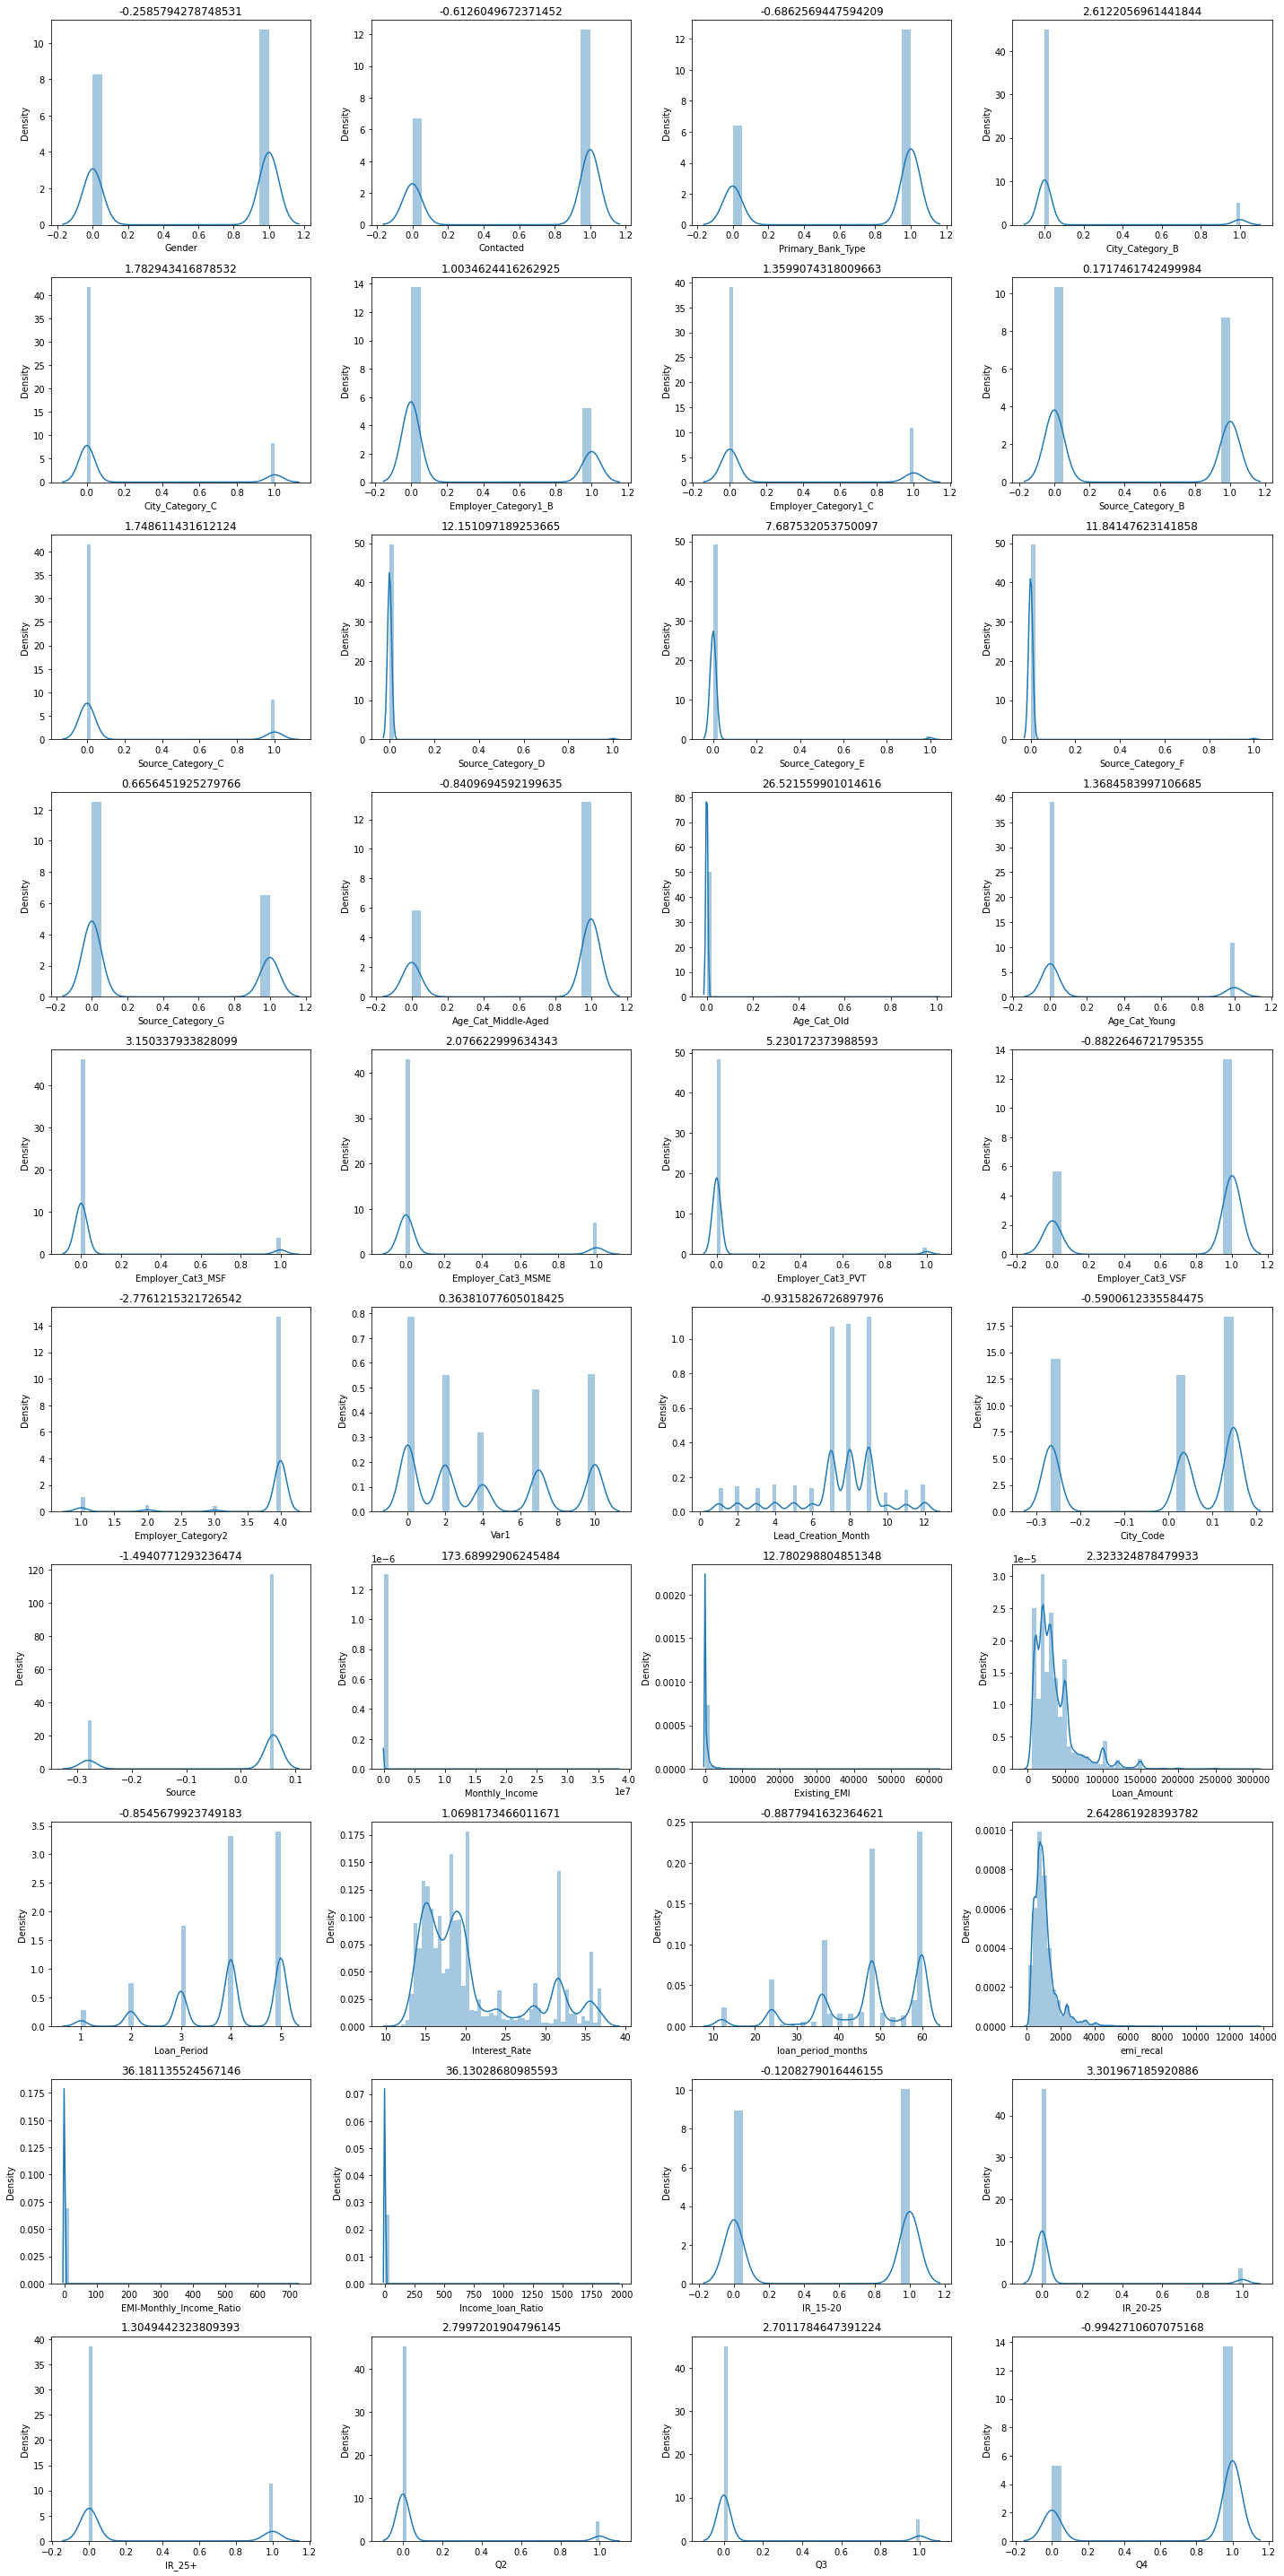

In [58]:
## Before Oversampling



a = 10
b = 4
c = 1

plt.figure(figsize = [20,40])

for i in xtrain_final.columns :
    plt.subplot(a,b,c)
    plt.title(xtrain_final[i].skew())
    sns.distplot(xtrain_final[i])
    c+=1
    
plt.tight_layout()
plt.show()
    

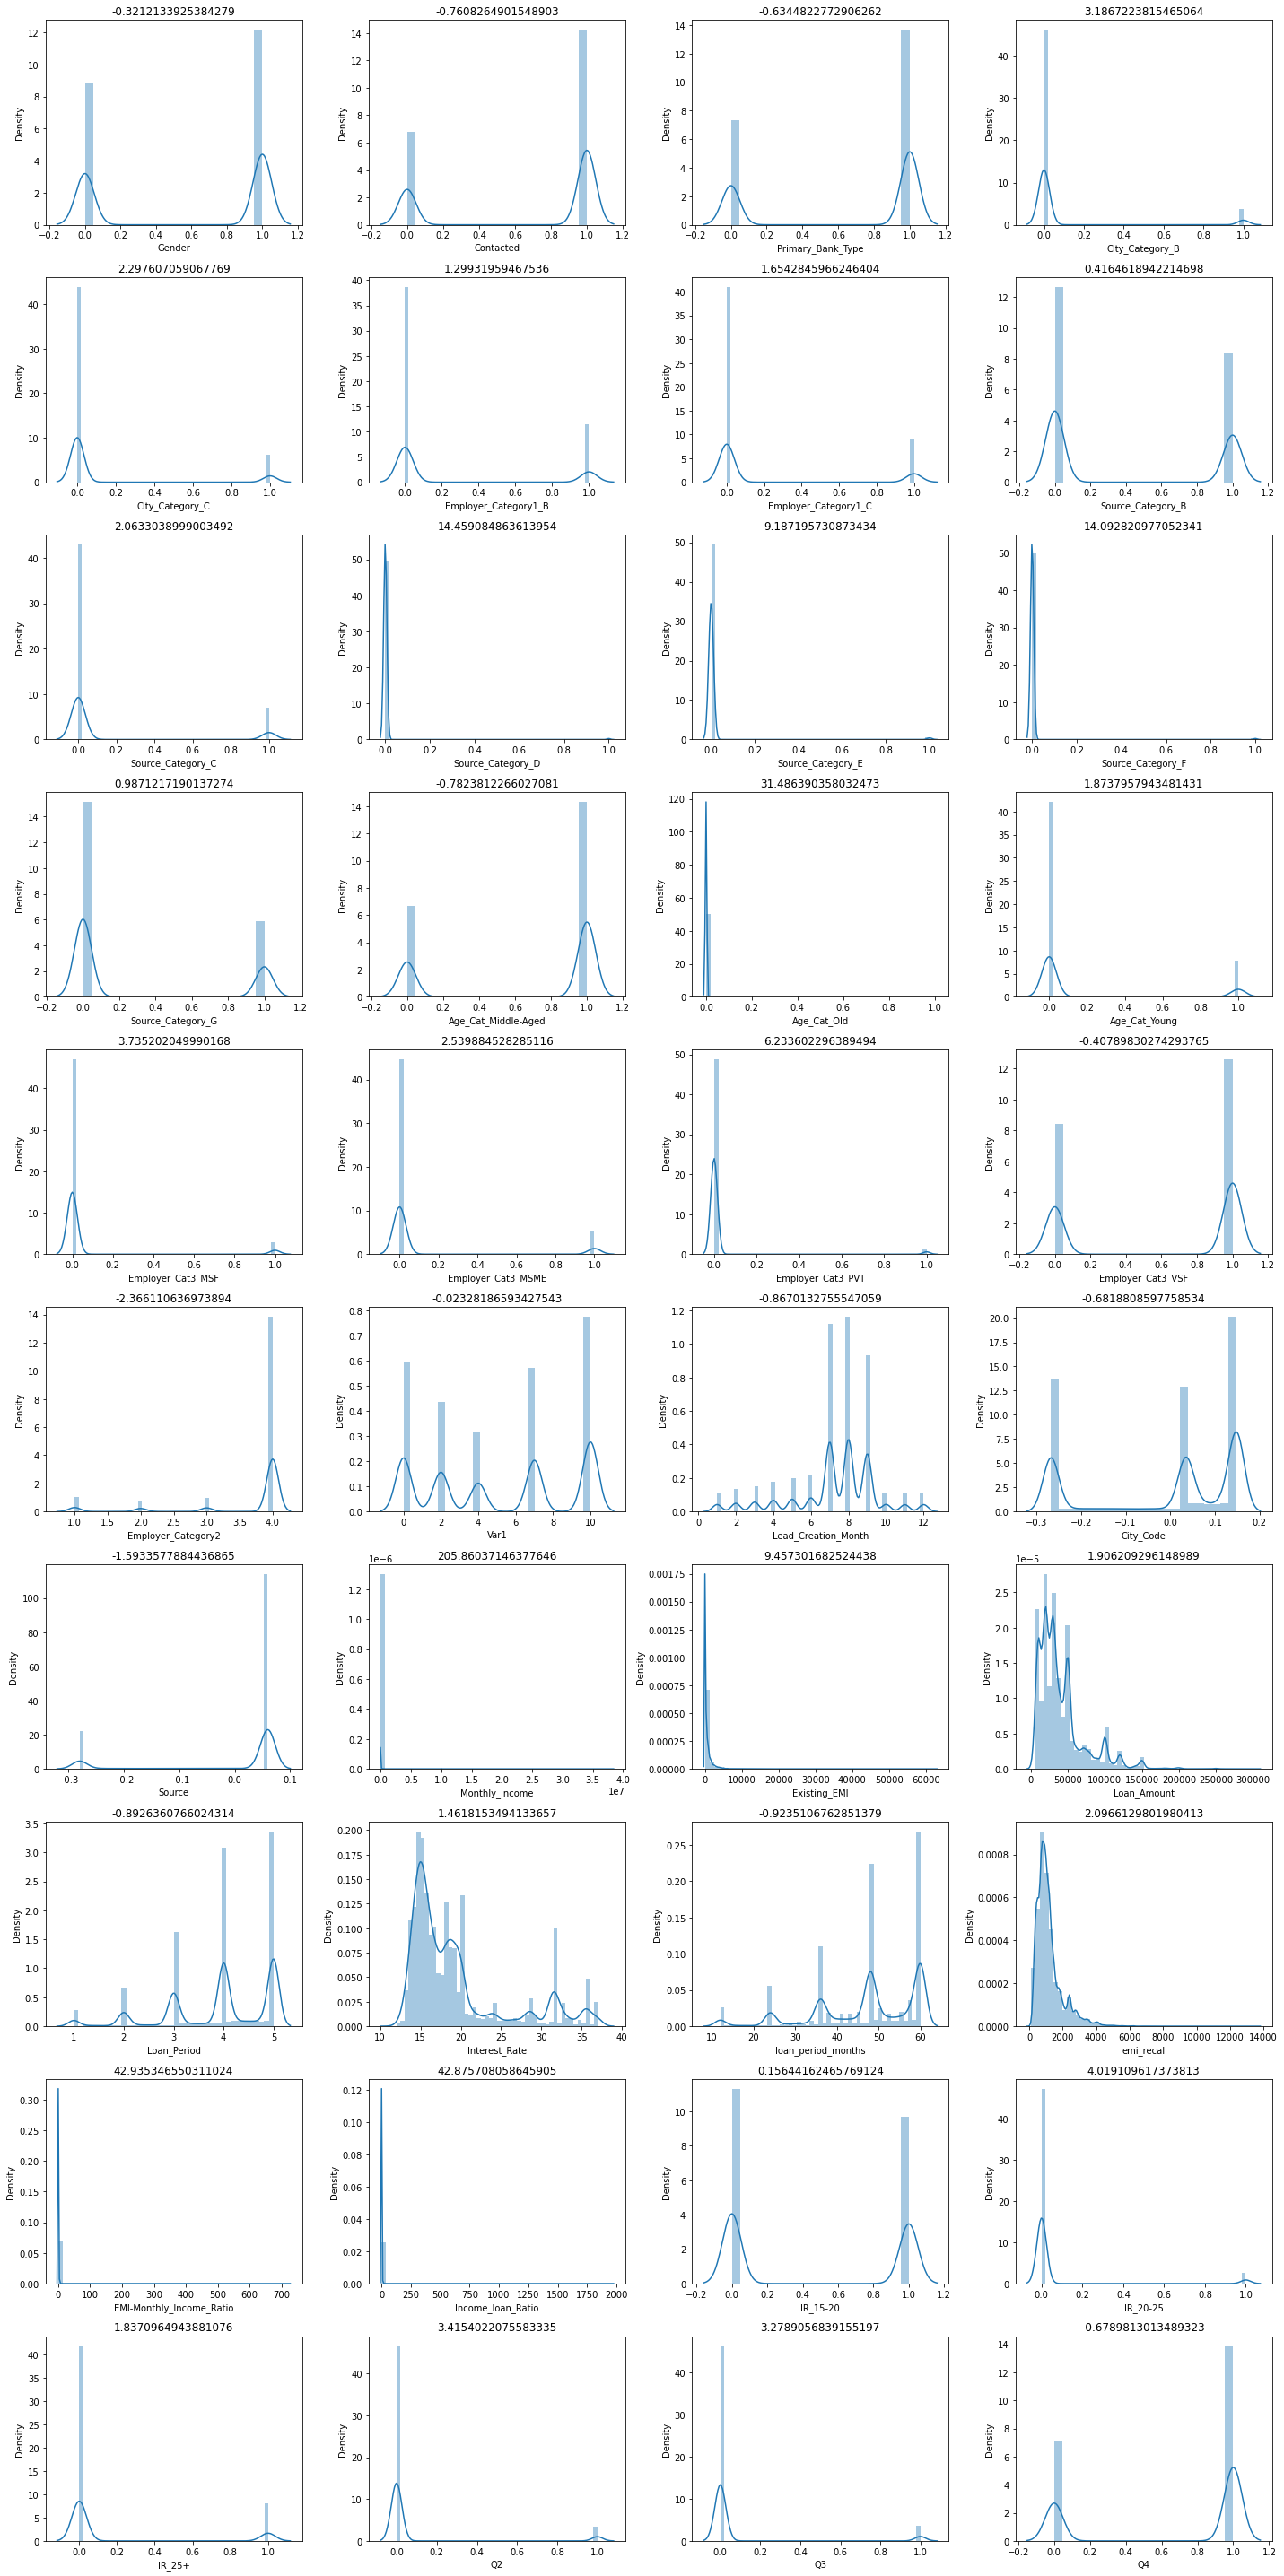

In [59]:
## After Oversampling



a = 10
b = 4
c = 1

plt.figure(figsize = [20,40])

for i in xtrain_samp.columns :
    plt.subplot(a,b,c)
    plt.title(xtrain_samp[i].skew())
    sns.distplot(xtrain_samp[i])
    c+=1
    
plt.tight_layout()
plt.show()
    

In [60]:
## Hence, we observed that there is no adverse effect or drastic change in distribution of respective features after oversampling.

### Preparing data for  Base Model

#### Since, initially we would go with Logistic Regression, we might need to transform and scale the desired numerical features
#### In case of Ensemble Models, we won't used the transformed and scaled dataset.

In [61]:
xtrain_samp.head()

,Gender,Contacted,Primary_Bank_Type,City_Category_B,City_Category_C,Employer_Category1_B,Employer_Category1_C,Source_Category_B,Source_Category_C,Source_Category_D,Source_Category_E,Source_Category_F,Source_Category_G,Age_Cat_Middle-Aged,Age_Cat_Old,Age_Cat_Young,Employer_Cat3_MSF,Employer_Cat3_MSME,Employer_Cat3_PVT,Employer_Cat3_VSF,Employer_Category2,Var1,Lead_Creation_Month,City_Code,Source,Monthly_Income,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,loan_period_months,emi_recal,EMI-Monthly_Income_Ratio,Income_loan_Ratio,IR_15-20,IR_20-25,IR_25+,Q2,Q3,Q4
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,4,0,7,0.148588,0.059791,1680.0,0.0,19600,3.0,18.040,40.8,646,0.384524,0.879263,1,0,0,0,0,1
1,1,1,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,4,2,5,-0.267721,0.059791,1350.0,0.0,30000,5.0,20.000,60.0,795,0.588889,1.597424,1,0,0,0,1,0
2,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,1,10,7,0.148588,0.059791,5200.0,0.0,90000,4.0,15.108,52.8,2344,0.450769,1.266409,1,0,0,0,0,1
3,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,4,0,12,-0.267721,-0.279869,1500.0,0.0,22000,4.0,35.500,48.0,864,0.576000,1.085929,0,0,1,0,0,0
4,1,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,4,2,7,0.034822,0.059791,1500.0,600.0,11000,5.0,20.000,60.0,291,0.594000,0.527150,1,0,0,0,0,1


In [62]:
xtrain_samp.columns

Index(['Gender', 'Contacted', 'Primary_Bank_Type', 'City_Category_B',
       'City_Category_C', 'Employer_Category1_B', 'Employer_Category1_C',
       'Source_Category_B', 'Source_Category_C', 'Source_Category_D',
       'Source_Category_E', 'Source_Category_F', 'Source_Category_G',
       'Age_Cat_Middle-Aged', 'Age_Cat_Old', 'Age_Cat_Young',
       'Employer_Cat3_MSF', 'Employer_Cat3_MSME', 'Employer_Cat3_PVT',
       'Employer_Cat3_VSF', 'Employer_Category2', 'Var1',
       'Lead_Creation_Month', 'City_Code', 'Source', 'Monthly_Income',
       'Existing_EMI', 'Loan_Amount', 'Loan_Period', 'Interest_Rate',
       'loan_period_months', 'emi_recal', 'EMI-Monthly_Income_Ratio',
       'Income_loan_Ratio', 'IR_15-20', 'IR_20-25', 'IR_25+', 'Q2', 'Q3',
       'Q4'],
      dtype='object')

In [63]:
xtrain_samp.shape

(73582, 40)

In [64]:
ytrain_samp = ytrain_samp.Approved

In [65]:
(ytrain_samp.value_counts()/len(ytrain_samp))*100         ## Oversampled to our desired ratio.

0    69.930146
1    30.069854
Name: Approved, dtype: float64

In [66]:
required_train = xtrain_samp.iloc[:,25:34]
required_train.head()

,Monthly_Income,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,loan_period_months,emi_recal,EMI-Monthly_Income_Ratio,Income_loan_Ratio
0,1680.0,0.0,19600,3.0,18.040,40.8,646,0.384524,0.879263
1,1350.0,0.0,30000,5.0,20.000,60.0,795,0.588889,1.597424
2,5200.0,0.0,90000,4.0,15.108,52.8,2344,0.450769,1.266409
3,1500.0,0.0,22000,4.0,35.500,48.0,864,0.576000,1.085929
4,1500.0,600.0,11000,5.0,20.000,60.0,291,0.594000,0.527150


In [67]:
xtest_final.columns

Index(['Gender', 'Contacted', 'Primary_Bank_Type', 'City_Category_B',
       'City_Category_C', 'Employer_Category1_B', 'Employer_Category1_C',
       'Source_Category_B', 'Source_Category_C', 'Source_Category_D',
       'Source_Category_E', 'Source_Category_F', 'Source_Category_G',
       'Age_Cat_Middle-Aged', 'Age_Cat_Old', 'Age_Cat_Young',
       'Employer_Cat3_MSF', 'Employer_Cat3_MSME', 'Employer_Cat3_PVT',
       'Employer_Cat3_VSF', 'Employer_Category2', 'Var1',
       'Lead_Creation_Month', 'City_Code', 'Source', 'Monthly_Income',
       'Existing_EMI', 'Loan_Amount', 'Loan_Period', 'Interest_Rate',
       'loan_period_months', 'emi_recal', 'EMI-Monthly_Income_Ratio',
       'Income_loan_Ratio', 'IR_15-20', 'IR_20-25', 'IR_25+', 'Q2', 'Q3',
       'Q4'],
      dtype='object')

In [68]:
required_test = xtest_final.iloc[:,25:34]
required_test.head()

,Monthly_Income,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,loan_period_months,emi_recal,EMI-Monthly_Income_Ratio,Income_loan_Ratio
0,3550.0,0.0,57000,5.0,14.264,60.0,1334,0.375775,1.154195
1,1000.0,0.0,27000,5.0,18.950,57.6,717,0.717000,1.952378
2,8000.0,0.0,139000,5.0,14.850,60.0,3296,0.412000,1.248986
3,2800.0,900.0,10000,2.0,20.000,24.0,509,0.503214,0.280534
4,2625.0,1000.0,18600,4.0,20.800,48.0,574,0.599619,0.524630


### Using Power Transform to Check skewness and then applying Standard Scaler to scale data across predictors.

In [69]:
pt = PowerTransformer()

a = pt.fit_transform(required_train)

pt_train = pd.DataFrame(a, columns = required_train.columns)
pt_train.head()

,Monthly_Income,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,loan_period_months,emi_recal,EMI-Monthly_Income_Ratio,Income_loan_Ratio
0,-0.828859,-0.824139,-0.610584,-1.029658,0.186713,-0.694193,-0.681396,-0.297815,0.227760
1,-1.116531,-0.824139,-0.027115,1.177051,0.604510,1.202412,-0.328904,0.685395,1.289112
2,0.647514,-0.824139,1.480604,-0.097938,-0.790723,0.393129,1.442350,0.055283,0.871270
3,-0.977860,-0.824139,-0.452288,-0.097938,1.779056,-0.080474,-0.188691,0.631863,0.596612
4,-0.977860,1.187673,-1.401711,1.177051,0.604510,1.202412,-2.074114,0.706352,-0.591202


In [70]:
b = pt.transform(required_test)

pt_test = pd.DataFrame(b,columns = required_test.columns)
pt_test.head()

,Monthly_Income,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,loan_period_months,emi_recal,EMI-Monthly_Income_Ratio,Income_loan_Ratio
0,0.150613,-0.824139,0.853436,1.177051,-1.196097,1.202412,0.532497,-0.347333,0.705104
1,-1.512286,-0.824139,-0.171571,1.177051,0.397780,0.919330,-0.503781,1.168393,1.646873
2,1.205980,-0.824139,2.077856,1.177051,-0.907013,1.202412,1.978549,-0.146812,0.846396
3,-0.159302,1.250449,-1.532175,-1.658984,0.604510,-1.693156,-1.091273,0.309981,-1.386531
4,-0.243708,1.265991,-0.682338,-0.097938,0.740266,-0.080474,-0.883927,0.729217,-0.598210


In [71]:
sc = StandardScaler()

x = sc.fit_transform(pt_train)

scaled_train = pd.DataFrame(x,columns = pt_train.columns)
scaled_train.head()

,Monthly_Income,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,loan_period_months,emi_recal,EMI-Monthly_Income_Ratio,Income_loan_Ratio
0,-0.828859,-0.824139,-0.610584,-1.029658,0.186713,-0.694193,-0.681396,-0.297815,0.227760
1,-1.116531,-0.824139,-0.027115,1.177051,0.604510,1.202412,-0.328904,0.685395,1.289112
2,0.647514,-0.824139,1.480604,-0.097938,-0.790723,0.393129,1.442350,0.055283,0.871270
3,-0.977860,-0.824139,-0.452288,-0.097938,1.779056,-0.080474,-0.188691,0.631863,0.596612
4,-0.977860,1.187673,-1.401711,1.177051,0.604510,1.202412,-2.074114,0.706352,-0.591202


In [72]:
y = sc.transform(pt_test)

scaled_test = pd.DataFrame(y,columns = pt_test.columns)
scaled_test.head()

,Monthly_Income,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,loan_period_months,emi_recal,EMI-Monthly_Income_Ratio,Income_loan_Ratio
0,0.150613,-0.824139,0.853436,1.177051,-1.196097,1.202412,0.532497,-0.347333,0.705104
1,-1.512286,-0.824139,-0.171571,1.177051,0.397780,0.919330,-0.503781,1.168393,1.646873
2,1.205980,-0.824139,2.077856,1.177051,-0.907013,1.202412,1.978549,-0.146812,0.846396
3,-0.159302,1.250449,-1.532175,-1.658984,0.604510,-1.693156,-1.091273,0.309981,-1.386531
4,-0.243708,1.265991,-0.682338,-0.097938,0.740266,-0.080474,-0.883927,0.729217,-0.598210


In [73]:
## Preparing final train n test after scaling

rest_train1 = xtrain_samp.iloc[:,0:25]
rest_test1 = xtest_final.iloc[:,0:25]
rest_train2 = xtrain_samp.iloc[:,34:]
rest_test2 = xtest_final.iloc[:,34:]

scaled_train = scaled_train.reset_index(drop = True)
scaled_test = scaled_test.reset_index(drop = True)
rest_train1 = rest_train1.reset_index(drop = True)
rest_test1 = rest_test1.reset_index(drop = True)
rest_train2 = rest_train2.reset_index(drop = True)
rest_test2 = rest_test2.reset_index(drop = True)

In [74]:
rest_train = pd.concat([rest_train1,rest_train2], axis = 1)
rest_test = pd.concat([rest_test1,rest_test2], axis = 1)

In [75]:
rest_train = rest_train.reset_index(drop = True)
rest_test = rest_test.reset_index(drop = True)

In [76]:
final_train = pd.concat([scaled_train,rest_train], axis = 1)
final_train.head()

,Monthly_Income,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,loan_period_months,emi_recal,EMI-Monthly_Income_Ratio,Income_loan_Ratio,Gender,Contacted,Primary_Bank_Type,City_Category_B,City_Category_C,Employer_Category1_B,Employer_Category1_C,Source_Category_B,Source_Category_C,Source_Category_D,Source_Category_E,Source_Category_F,Source_Category_G,Age_Cat_Middle-Aged,Age_Cat_Old,Age_Cat_Young,Employer_Cat3_MSF,Employer_Cat3_MSME,Employer_Cat3_PVT,Employer_Cat3_VSF,Employer_Category2,Var1,Lead_Creation_Month,City_Code,Source,IR_15-20,IR_20-25,IR_25+,Q2,Q3,Q4
0,-0.828859,-0.824139,-0.610584,-1.029658,0.186713,-0.694193,-0.681396,-0.297815,0.227760,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,4,0,7,0.148588,0.059791,1,0,0,0,0,1
1,-1.116531,-0.824139,-0.027115,1.177051,0.604510,1.202412,-0.328904,0.685395,1.289112,1,1,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,4,2,5,-0.267721,0.059791,1,0,0,0,1,0
2,0.647514,-0.824139,1.480604,-0.097938,-0.790723,0.393129,1.442350,0.055283,0.871270,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,1,10,7,0.148588,0.059791,1,0,0,0,0,1
3,-0.977860,-0.824139,-0.452288,-0.097938,1.779056,-0.080474,-0.188691,0.631863,0.596612,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,4,0,12,-0.267721,-0.279869,0,0,1,0,0,0
4,-0.977860,1.187673,-1.401711,1.177051,0.604510,1.202412,-2.074114,0.706352,-0.591202,1,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,4,2,7,0.034822,0.059791,1,0,0,0,0,1


In [77]:
final_train.shape

(73582, 40)

In [78]:
xtrain_samp.shape

(73582, 40)

In [79]:
final_test = pd.concat([scaled_test,rest_test], axis = 1)
final_test.head()

,Monthly_Income,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,loan_period_months,emi_recal,EMI-Monthly_Income_Ratio,Income_loan_Ratio,Gender,Contacted,Primary_Bank_Type,City_Category_B,City_Category_C,Employer_Category1_B,Employer_Category1_C,Source_Category_B,Source_Category_C,Source_Category_D,Source_Category_E,Source_Category_F,Source_Category_G,Age_Cat_Middle-Aged,Age_Cat_Old,Age_Cat_Young,Employer_Cat3_MSF,Employer_Cat3_MSME,Employer_Cat3_PVT,Employer_Cat3_VSF,Employer_Category2,Var1,Lead_Creation_Month,City_Code,Source,IR_15-20,IR_20-25,IR_25+,Q2,Q3,Q4
0,0.150613,-0.824139,0.853436,1.177051,-1.196097,1.202412,0.532497,-0.347333,0.705104,1,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,4,7,7,0.034822,0.059791,0,0,0,0,0,1
1,-1.512286,-0.824139,-0.171571,1.177051,0.397780,0.919330,-0.503781,1.168393,1.646873,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,4,0,8,0.148588,0.059791,1,0,0,0,0,1
2,1.205980,-0.824139,2.077856,1.177051,-0.907013,1.202412,1.978549,-0.146812,0.846396,1,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,4,10,4,0.034822,-0.279869,0,0,0,0,1,0
3,-0.159302,1.250449,-1.532175,-1.658984,0.604510,-1.693156,-1.091273,0.309981,-1.386531,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,4,7,12,-0.267721,0.059791,1,0,0,0,0,0
4,-0.243708,1.265991,-0.682338,-0.097938,0.740266,-0.080474,-0.883927,0.729217,-0.598210,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,4,0,8,-0.267721,0.059791,0,1,0,0,0,1


In [80]:
final_test.shape

(13068, 40)

In [81]:
xtest_final.shape

(13068, 40)

### Dealing with Issue of Multi-Collinearity via VIF

#### Iterating for data set after transformation and scaling for Logistic Regression.

#### Train data set

In [82]:
my_list = []

for i in range(final_train.shape[1]) :
    my_list.append(variance_inflation_factor(final_train.values,i))
    
vif1 = pd.DataFrame({'Features' : final_train.columns,'VIF' : my_list}).sort_values(by = 'VIF', ascending = False) 
vif1

,Features,VIF
5,loan_period_months,67.885831
3,Loan_Period,62.524592
2,Loan_Amount,48.125323
6,emi_recal,26.589895
8,Income_loan_Ratio,25.555882
29,Employer_Category2,21.121290
0,Monthly_Income,20.462489
31,Lead_Creation_Month,19.530967
10,Contacted,11.267377
30,Var1,8.166708


In [83]:
## Dropping 'loan_period_months' and iterating again

my_list = []
new_train1 = final_train.drop('loan_period_months',axis = 1)

for i in range(new_train1.shape[1]) :
    my_list.append(variance_inflation_factor(new_train1.values,i))
    
vif2 = pd.DataFrame({'Features' : new_train1.columns,'VIF' : my_list}).sort_values(by = 'VIF', ascending = False) 
vif2

,Features,VIF
2,Loan_Amount,45.051190
7,Income_loan_Ratio,25.552492
5,emi_recal,24.736193
28,Employer_Category2,21.113701
0,Monthly_Income,20.459721
30,Lead_Creation_Month,19.518808
9,Contacted,11.226451
29,Var1,8.166599
8,Gender,6.982824
35,IR_25+,6.904845


In [84]:
## Dropping 'Loan_Amount' and iterating again

my_list = []
new_train2 = new_train1.drop('Loan_Amount',axis = 1)

for i in range(new_train2.shape[1]) :
    my_list.append(variance_inflation_factor(new_train2.values,i))
    
vif3 = pd.DataFrame({'Features' : new_train2.columns,'VIF' : my_list}).sort_values(by = 'VIF', ascending = False) 
vif3

,Features,VIF
27,Employer_Category2,21.091055
29,Lead_Creation_Month,19.487508
6,Income_loan_Ratio,17.073559
0,Monthly_Income,15.662872
4,emi_recal,11.874296
8,Contacted,11.211683
28,Var1,8.133815
7,Gender,6.982370
34,IR_25+,6.901254
26,Employer_Cat3_VSF,6.701152


In [85]:
## Dropping 'Employer_Category2' and iterating again

my_list = []
new_train3 = new_train2.drop('Employer_Category2',axis = 1)

for i in range(new_train3.shape[1]) :
    my_list.append(variance_inflation_factor(new_train3.values,i))
    
vif4 = pd.DataFrame({'Features' : new_train3.columns,'VIF' : my_list}).sort_values(by = 'VIF', ascending = False) 
vif4

,Features,VIF
6,Income_loan_Ratio,17.056663
0,Monthly_Income,15.660089
28,Lead_Creation_Month,14.754705
4,emi_recal,11.866575
8,Contacted,11.178162
27,Var1,7.939578
7,Gender,6.977946
33,IR_25+,6.830536
3,Interest_Rate,6.123385
20,Age_Cat_Middle-Aged,5.607929


In [86]:
## Dropping 'Income_loan_Ratio' and iterating again

my_list = []
new_train4 = new_train3.drop('Income_loan_Ratio',axis = 1)

for i in range(new_train4.shape[1]) :
    my_list.append(variance_inflation_factor(new_train4.values,i))
    
vif5 = pd.DataFrame({'Features' : new_train4.columns,'VIF' : my_list}).sort_values(by = 'VIF', ascending = False) 
vif5

,Features,VIF
27,Lead_Creation_Month,14.715511
7,Contacted,11.163503
26,Var1,7.917184
6,Gender,6.977874
32,IR_25+,6.809025
0,Monthly_Income,6.769904
3,Interest_Rate,6.074414
19,Age_Cat_Middle-Aged,5.606591
25,Employer_Cat3_VSF,5.292064
5,EMI-Monthly_Income_Ratio,5.122177


In [87]:
## Dropping 'Lead_Creation_Month' and iterating again

my_list = []
new_train5 = new_train4.drop('Lead_Creation_Month',axis = 1)

for i in range(new_train5.shape[1]) :
    my_list.append(variance_inflation_factor(new_train5.values,i))
    
vif6 = pd.DataFrame({'Features' : new_train5.columns,'VIF' : my_list}).sort_values(by = 'VIF', ascending = False) 
vif6

,Features,VIF
7,Contacted,11.048055
26,Var1,7.415131
6,Gender,6.975906
0,Monthly_Income,6.760032
31,IR_25+,6.374843
3,Interest_Rate,5.911615
19,Age_Cat_Middle-Aged,5.189312
25,Employer_Cat3_VSF,5.035473
5,EMI-Monthly_Income_Ratio,5.035163
4,emi_recal,4.827871


In [88]:
## Dropping 'Contacted' and iterating again

my_list = []
new_train6 = new_train5.drop('Contacted',axis = 1)

for i in range(new_train6.shape[1]) :
    my_list.append(variance_inflation_factor(new_train6.values,i))
    
vif7 = pd.DataFrame({'Features' : new_train6.columns,'VIF' : my_list}).sort_values(by = 'VIF', ascending = False) 
vif7

,Features,VIF
0,Monthly_Income,6.726833
25,Var1,6.500271
30,IR_25+,6.374374
3,Interest_Rate,5.908960
18,Age_Cat_Middle-Aged,5.183066
24,Employer_Cat3_VSF,5.025205
5,EMI-Monthly_Income_Ratio,4.987957
4,emi_recal,4.825569
33,Q4,4.697115
12,Source_Category_B,4.690661


### By iterating for VIF scores for 7 times we were able to deal with the multicollinearity issue.
#### Columns dropped are - 
*1.loan_period_months
*2.Loan_Amount
*3. Employer_Category2
*4. Income_loan_Ratio
*5. Lead_Creation_Month
*6. Contacted

#### Preparing train and test for Logistic Regression after VIF iteration

In [89]:
lg_train = new_train6
lg_train.head()

,Monthly_Income,Existing_EMI,Loan_Period,Interest_Rate,emi_recal,EMI-Monthly_Income_Ratio,Gender,Primary_Bank_Type,City_Category_B,City_Category_C,Employer_Category1_B,Employer_Category1_C,Source_Category_B,Source_Category_C,Source_Category_D,Source_Category_E,Source_Category_F,Source_Category_G,Age_Cat_Middle-Aged,Age_Cat_Old,Age_Cat_Young,Employer_Cat3_MSF,Employer_Cat3_MSME,Employer_Cat3_PVT,Employer_Cat3_VSF,Var1,City_Code,Source,IR_15-20,IR_20-25,IR_25+,Q2,Q3,Q4
0,-0.828859,-0.824139,-1.029658,0.186713,-0.681396,-0.297815,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0.148588,0.059791,1,0,0,0,0,1
1,-1.116531,-0.824139,1.177051,0.604510,-0.328904,0.685395,1,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,2,-0.267721,0.059791,1,0,0,0,1,0
2,0.647514,-0.824139,-0.097938,-0.790723,1.442350,0.055283,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,10,0.148588,0.059791,1,0,0,0,0,1
3,-0.977860,-0.824139,-0.097938,1.779056,-0.188691,0.631863,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,-0.267721,-0.279869,0,0,1,0,0,0
4,-0.977860,1.187673,1.177051,0.604510,-2.074114,0.706352,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,2,0.034822,0.059791,1,0,0,0,0,1


In [90]:
lg_train.shape

(73582, 34)

In [91]:
lg_test = final_test.drop(['loan_period_months','Loan_Amount','Employer_Category2','Income_loan_Ratio','Lead_Creation_Month','Contacted'], axis = 1)
lg_test.head()

,Monthly_Income,Existing_EMI,Loan_Period,Interest_Rate,emi_recal,EMI-Monthly_Income_Ratio,Gender,Primary_Bank_Type,City_Category_B,City_Category_C,Employer_Category1_B,Employer_Category1_C,Source_Category_B,Source_Category_C,Source_Category_D,Source_Category_E,Source_Category_F,Source_Category_G,Age_Cat_Middle-Aged,Age_Cat_Old,Age_Cat_Young,Employer_Cat3_MSF,Employer_Cat3_MSME,Employer_Cat3_PVT,Employer_Cat3_VSF,Var1,City_Code,Source,IR_15-20,IR_20-25,IR_25+,Q2,Q3,Q4
0,0.150613,-0.824139,1.177051,-1.196097,0.532497,-0.347333,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,7,0.034822,0.059791,0,0,0,0,0,1
1,-1.512286,-0.824139,1.177051,0.397780,-0.503781,1.168393,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0.148588,0.059791,1,0,0,0,0,1
2,1.205980,-0.824139,1.177051,-0.907013,1.978549,-0.146812,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,10,0.034822,-0.279869,0,0,0,0,1,0
3,-0.159302,1.250449,-1.658984,0.604510,-1.091273,0.309981,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,7,-0.267721,0.059791,1,0,0,0,0,0
4,-0.243708,1.265991,-0.097938,0.740266,-0.883927,0.729217,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,-0.267721,0.059791,0,1,0,0,0,1


In [92]:
lg_test.shape

(13068, 34)

### Selecting Features for Ensemble Methods by using SFS

In [93]:
dts = DecisionTreeClassifier()
rfs = RandomForestClassifier()

In [94]:
sfs1 = SFS(estimator = dts,k_features = 'best',forward = True, cv = 5, scoring = 'roc_auc' )

sfs1.fit(xtrain_samp,ytrain_samp)

print('Best Features : ', sfs1.k_feature_names_)

print('ROC Score : ',sfs1.k_score_)

Best Features :  ('Gender', 'Contacted', 'City_Category_B', 'Source_Category_B', 'Source_Category_C', 'Source_Category_D', 'Source_Category_E', 'Source_Category_F', 'Source_Category_G', 'Age_Cat_Middle-Aged', 'Age_Cat_Old', 'Age_Cat_Young', 'Employer_Cat3_MSME', 'Employer_Cat3_PVT', 'Employer_Category2', 'Var1', 'City_Code', 'Source', 'Monthly_Income', 'Loan_Amount', 'Loan_Period', 'Interest_Rate', 'loan_period_months', 'emi_recal', 'Income_loan_Ratio', 'IR_15-20', 'IR_20-25', 'IR_25+', 'Q2', 'Q3')
ROC Score :  0.9663150975431714


sfs2 = SFS(estimator = rfs,k_features = 'best',forward = True, cv = 5, scoring = 'roc_auc' )

sfs2.fit(xtrain_samp,ytrain_samp)

print('Best Features : ', sfs2.k_feature_names_)

print('ROC Score : ',sfs2.k_score_)

In [95]:
## More than 30 mins to run...

### Using RFE

In [96]:
rfe = RFE(estimator = rfs, n_features_to_select = 20)

rfe.fit(xtrain_samp,ytrain_samp)

feat_index = pd.Series(data = rfe.ranking_ ,index = xtrain_samp.columns )

sign_feat = feat_index[feat_index == 1].index

print('Significan Features are ', '\n',sign_feat)

Significan Features are  
 Index(['Source_Category_B', 'Source_Category_G', 'Employer_Cat3_MSF',
       'Employer_Cat3_MSME', 'Employer_Cat3_VSF', 'Employer_Category2', 'Var1',
       'Lead_Creation_Month', 'City_Code', 'Source', 'Monthly_Income',
       'Existing_EMI', 'Loan_Amount', 'Loan_Period', 'Interest_Rate',
       'loan_period_months', 'emi_recal', 'EMI-Monthly_Income_Ratio',
       'Income_loan_Ratio', 'IR_15-20'],
      dtype='object')


In [97]:
## Let's pick predictors basis RFE as seen above that most of the features selected by RFE and SFS are in sync.

### Functions for Confusion Matrix and ROC_AUC

In [98]:
def plot_cm(model, test_data):
     
    y_pred = model.predict(test_data)
    
    cm = confusion_matrix(ytest, y_pred)

    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
                linewidths = 0.1, annot_kws = {'size':25})

  
    plt.xticks(fontsize = 20)

    
    plt.yticks(fontsize = 20)

    
    plt.show()

In [99]:
def roc(model, test_data):
    
    y_pred_prob = model.predict_proba(test_data)[:,1]
    
    fpr, tpr, thresholds = roc_curve(ytest, y_pred_prob)

    plt.plot(fpr, tpr)

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])

    plt.plot([0, 1], [0, 1],'r--')

    plt.title('ROC Curve', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

    plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(ytest, y_pred_prob),4)))

    plt.grid(True)

### 1. Logistic Regression

In [100]:
lg = LogisticRegression()

lg.fit(lg_train,ytrain_samp)

LogisticRegression()

In [101]:
pred_lg = lg.predict(lg_test)

In [102]:
print(classification_report(ytest,pred_lg))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98     12867
           1       0.04      0.07      0.05       201

    accuracy                           0.96     13068
   macro avg       0.51      0.52      0.51     13068
weighted avg       0.97      0.96      0.96     13068



In [103]:
print('Cohen-Kappa Score is ', cohen_kappa_score(ytest,pred_lg))

Cohen-Kappa Score is  0.03034036322876643


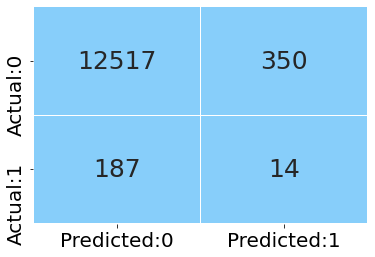

In [104]:
plot_cm(lg,lg_test)

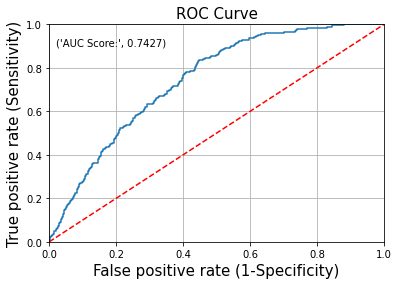

In [105]:
roc(lg,lg_test)

In [106]:
d = 2*log_loss(ytest,pred_lg,normalize = True)

print('Deviance of the model is ', round(d,4))

Deviance of the model is  2.8386


### 2. Decision Tree

In [107]:
## Selecting features bais RFE

rfe_train = xtrain_samp.loc[:,['Source_Category_B', 'Source_Category_G', 'Employer_Cat3_MSF',
       'Employer_Cat3_MSME', 'Employer_Cat3_VSF', 'Employer_Category2', 'Var1',
       'Lead_Creation_Month', 'City_Code', 'Source', 'Monthly_Income',
       'Existing_EMI', 'Loan_Amount', 'Loan_Period', 'Interest_Rate',
       'loan_period_months', 'emi_recal', 'EMI-Monthly_Income_Ratio',
       'Income_loan_Ratio', 'IR_15-20']]

rfe_test = xtest_final.loc[:,['Source_Category_B', 'Source_Category_G', 'Employer_Cat3_MSF',
       'Employer_Cat3_MSME', 'Employer_Cat3_VSF', 'Employer_Category2', 'Var1',
       'Lead_Creation_Month', 'City_Code', 'Source', 'Monthly_Income',
       'Existing_EMI', 'Loan_Amount', 'Loan_Period', 'Interest_Rate',
       'loan_period_months', 'emi_recal', 'EMI-Monthly_Income_Ratio',
       'Income_loan_Ratio', 'IR_15-20']]

In [108]:
dt = DecisionTreeClassifier()

dt.fit(rfe_train,ytrain_samp)

DecisionTreeClassifier()

In [109]:
pred_dt = dt.predict(rfe_test)

In [110]:
print(classification_report(ytest,pred_dt))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98     12867
           1       0.04      0.06      0.05       201

    accuracy                           0.96     13068
   macro avg       0.51      0.52      0.51     13068
weighted avg       0.97      0.96      0.96     13068



In [111]:
print('Cohen-Kappa Score is ', cohen_kappa_score(ytest,pred_dt))

Cohen-Kappa Score is  0.0264235906359922


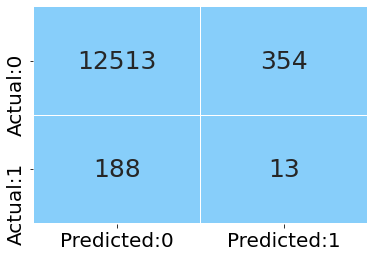

In [112]:
plot_cm(dt,rfe_test)

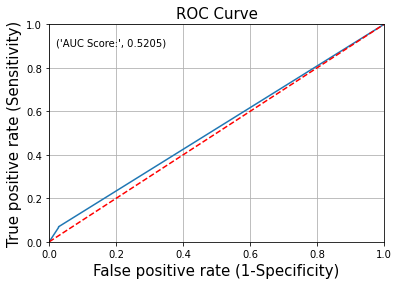

In [113]:
roc(dt,rfe_test)

In [114]:
d = 2*log_loss(ytest,pred_dt,normalize = True)

print('Deviance of the model is ', round(d,4))

Deviance of the model is  2.8651


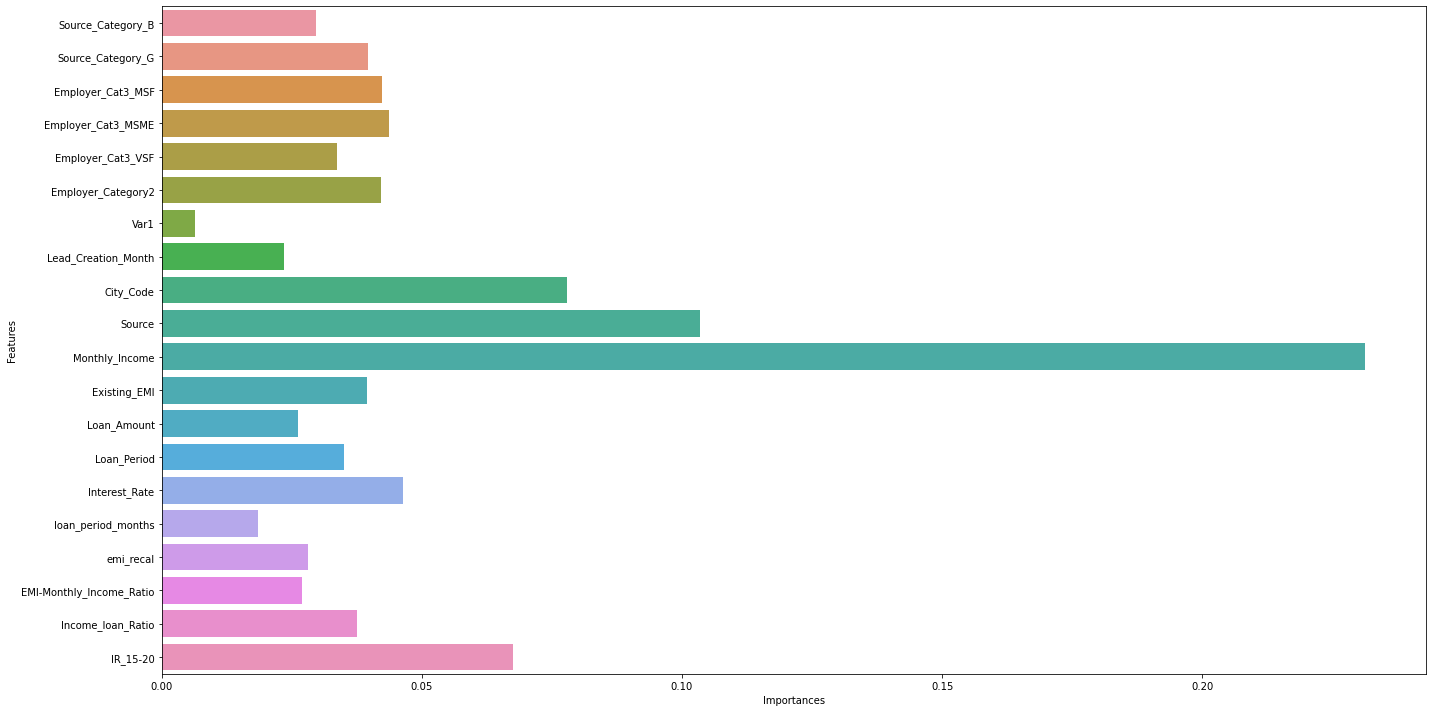

In [115]:
important_features1 = pd.DataFrame({'Features':rfe_train.columns,'Importances':dt.feature_importances_})

important_features1.sort_values(by = 'Importances',ascending = False)

plt.figure(figsize = [20,10])
sns.barplot(x = 'Importances', y = 'Features', data = important_features1)
plt.tight_layout()
plt.show()

### 3. Random Forest

In [116]:
rf = RandomForestClassifier(random_state = 42)

rf.fit(rfe_train,ytrain_samp)

RandomForestClassifier(random_state=42)

In [117]:
pred_rf = rf.predict(rfe_test)

In [118]:
print(classification_report(ytest,pred_rf))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     12867
           1       0.05      0.01      0.02       201

    accuracy                           0.98     13068
   macro avg       0.52      0.50      0.50     13068
weighted avg       0.97      0.98      0.98     13068



In [119]:
print('Cohen-Kappa Score is ', cohen_kappa_score(ytest,pred_rf))

Cohen-Kappa Score is  0.011203555960793254


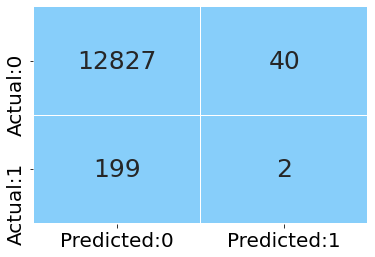

In [120]:
plot_cm(rf,rfe_test)

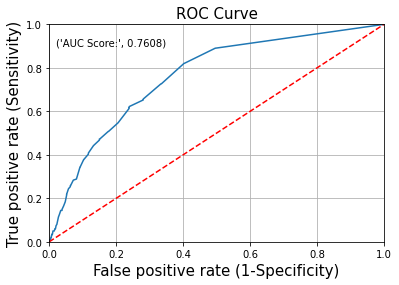

In [121]:
roc(rf,rfe_test)

In [122]:
d = 2*log_loss(ytest,pred_rf,normalize = True)

print('Deviance of the model is ', round(d,4))

Deviance of the model is  1.2634


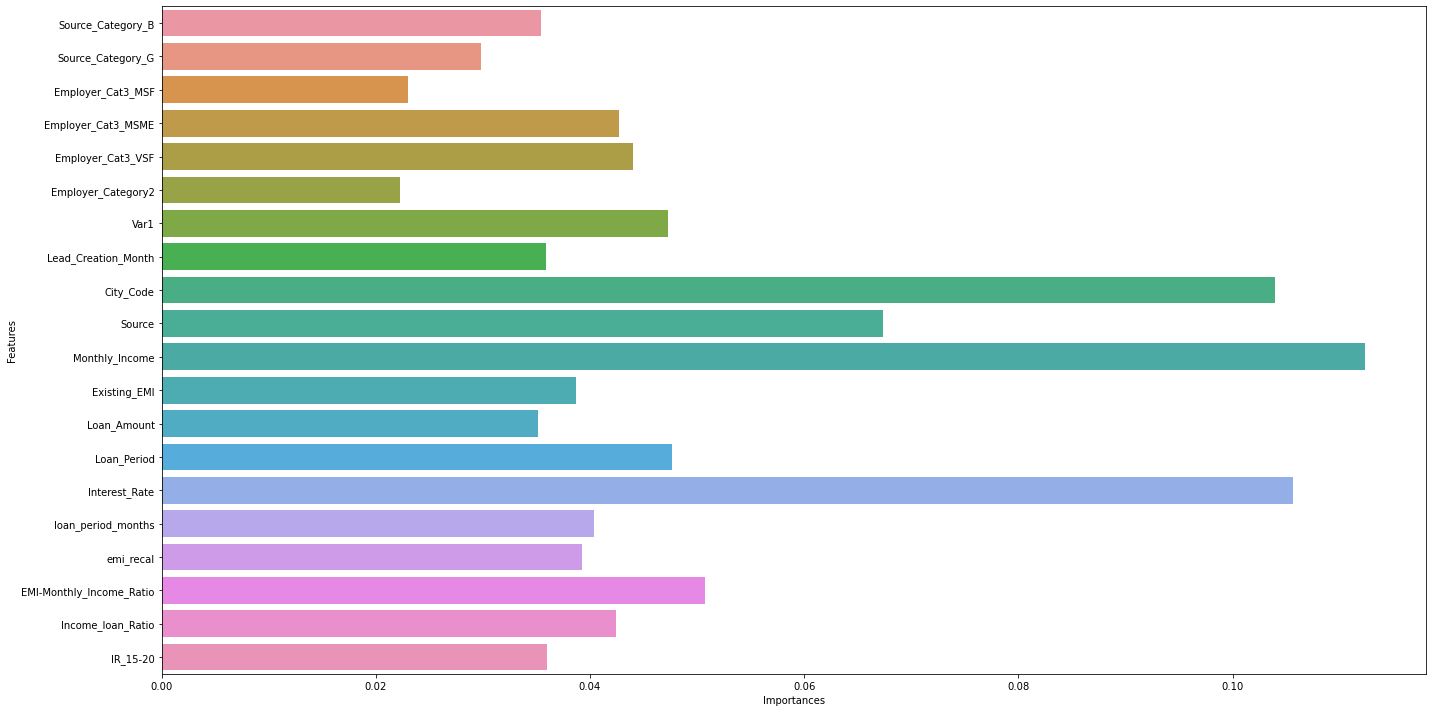

In [123]:
important_features2 = pd.DataFrame({'Features':rfe_train.columns,'Importances':rf.feature_importances_})

important_features2.sort_values(by = 'Importances',ascending = False)

plt.figure(figsize = [20,10])
sns.barplot(x = 'Importances', y = 'Features', data = important_features2)
plt.tight_layout()
plt.show()

### 4. Gaussian NB

In [124]:
gb = GaussianNB()

gb.fit(lg_train,ytrain_samp)

GaussianNB()

In [125]:
pred_gb = gb.predict(lg_test)

In [126]:
print(classification_report(ytest,pred_gb))

              precision    recall  f1-score   support

           0       0.99      0.68      0.81     12867
           1       0.03      0.61      0.06       201

    accuracy                           0.68     13068
   macro avg       0.51      0.65      0.43     13068
weighted avg       0.98      0.68      0.79     13068



In [127]:
print('Cohen-Kappa Score is ', cohen_kappa_score(ytest,pred_gb))

Cohen-Kappa Score is  0.02656141303938575


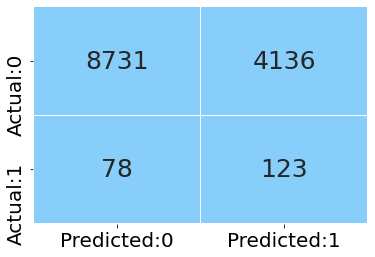

In [128]:
plot_cm(gb,lg_test)

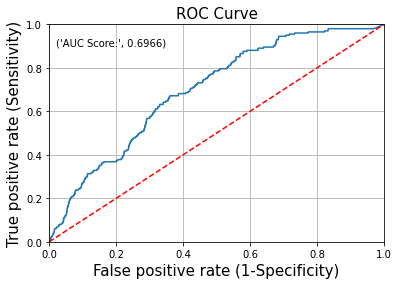

In [129]:
roc(gb,lg_test)

In [130]:
d = 2*log_loss(ytest,pred_gb,normalize = True)

print('Deviance of the model is ', round(d,4))

Deviance of the model is  22.2757


### 5. KNN Classifier

In [131]:
knn = KNeighborsClassifier()

knn.fit(lg_train,ytrain_samp)

KNeighborsClassifier()

In [132]:
pred_knn = knn.predict(lg_test)

In [133]:
print(classification_report(ytest,pred_knn))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97     12867
           1       0.06      0.19      0.09       201

    accuracy                           0.94     13068
   macro avg       0.52      0.57      0.53     13068
weighted avg       0.97      0.94      0.96     13068



In [134]:
print('Cohen-Kappa Score is ', cohen_kappa_score(ytest,pred_knn))

Cohen-Kappa Score is  0.07075692678356305


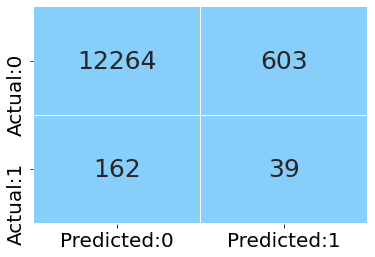

In [135]:
plot_cm(knn,lg_test)

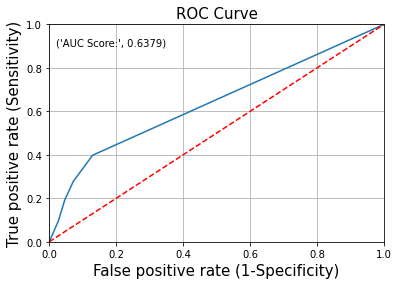

In [136]:
roc(knn,lg_test)

In [137]:
d = 2*log_loss(ytest,pred_knn,normalize = True)

print('Deviance of the model is ', round(d,4))

Deviance of the model is  4.0439


### Out of all the base models, GNB is giving a better trade off between Accuracy and Recall

Hyperparameter Tuning for RF model, to further use as a base learner for Stacking Models

In [138]:
## Parameters needed to tune to run Parallel RF based on OOB errors of each sample to assign weights to each Decision Tree.
## Lower OOB errors in a DT is assigned higher weight in parallel prediction process.

In [139]:
## 'n_estimators','criterion','min_samples_split','oob_score = True','n_jobs = -1' and 'max_samples'

rf = RandomForestClassifier(random_state = 42)

from pprint import pprint


print('Parameters currently in use:\n')
pprint(rf.get_params())

from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

min_samples_split = [2, 5, 10]

min_samples_leaf = [1, 2, 4]

bootstrap = [True, False]

max_samples = np.arange(1000,10000,1000)


random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'max_samples': max_samples}

pprint(random_grid)

rf = RandomForestClassifier(random_state = 42)

rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 100, scoring='roc_auc', 
                              cv = 3, random_state=42, n_jobs=-1)


rf_random.fit(rfe_train,ytrain_samp)

rf_random.best_params_

rf2 = RandomForestClassifier(random_state = 10, oob_score = True, n_jobs = -1,bootstrap = True)

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

min_samples_split = [2, 5, 10]

min_samples_leaf = [1, 2, 4]

tuned = [{'n_estimators':n_estimators,
          'max_features':max_features,
          'max_depth':max_depth,
         'min_samples_split':min_samples_split,
          'min_samples_leaf':min_samples_leaf}]

grid = GridSearchCV(estimator = rf2, param_grid = tuned,scoring = 'roc_auc',cv = 3)

grid.fit(rfe_train,ytrain_samp)

grid.best_params_

### Stacking Models

In [141]:
from sklearn.ensemble import StackingClassifier

In [142]:
rf2 = RandomForestClassifier(random_state = 10, oob_score = True, n_jobs = -1,bootstrap = True)

rf2.fit(rfe_train,ytrain_samp)

RandomForestClassifier(n_jobs=-1, oob_score=True, random_state=10)

In [144]:
base_learners = [('lg' , LogisticRegression()),
                 ('rf2', RandomForestClassifier(criterion = 'entropy', max_depth = 10, max_features = 'sqrt', 
                                                     max_leaf_nodes = 8, min_samples_leaf = 5, min_samples_split = 2, 
                                                     n_estimators = 50, random_state = 10,oob_score = True, n_jobs = -1,bootstrap = True)),
                 ('knn', KNeighborsClassifier(n_neighbors = 17, metric = 'euclidean'))]

stack_model = StackingClassifier(estimators = base_learners, final_estimator = GaussianNB())


stack_model.fit(rfe_train,ytrain_samp)

StackingClassifier(estimators=[('lg', LogisticRegression()),
                               ('rf2',
                                RandomForestClassifier(criterion='entropy',
                                                       max_depth=10,
                                                       max_features='sqrt',
                                                       max_leaf_nodes=8,
                                                       min_samples_leaf=5,
                                                       n_estimators=50,
                                                       n_jobs=-1,
                                                       oob_score=True,
                                                       random_state=10)),
                               ('knn',
                                KNeighborsClassifier(metric='euclidean',
                                                     n_neighbors=17))],
                   final_estimator=GaussianNB())

In [145]:
pred_stack = stack_model.predict(rfe_test)

In [146]:
print(classification_report(ytest,pred_stack))

              precision    recall  f1-score   support

           0       0.99      0.90      0.94     12867
           1       0.07      0.44      0.11       201

    accuracy                           0.89     13068
   macro avg       0.53      0.67      0.53     13068
weighted avg       0.98      0.89      0.93     13068



In [147]:
print('Cohen-Kappa Score is ', cohen_kappa_score(ytest,pred_stack))

Cohen-Kappa Score is  0.09017502028712554


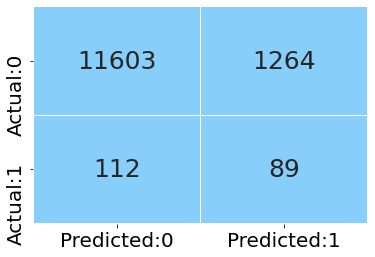

In [148]:
plot_cm(stack_model,rfe_test)

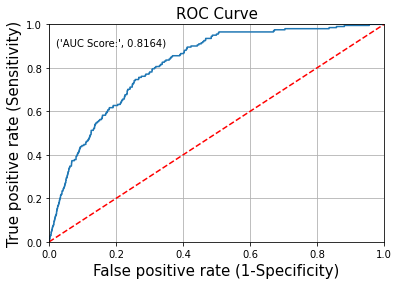

In [149]:
roc(stack_model,rfe_test)

In [150]:
d = 2*log_loss(ytest,pred_stack,normalize = True)

print('Deviance of the model is ', round(d,4))

Deviance of the model is  7.2737


### Thus, we observe that stacking model has best ROC_AUC values across all other models. 
### This further shows that the separation of classes is achieved best here, in other words using balanced approach via oversampling minority to train the model has shown a bit positive results,compared to other models, in dealing with the high imbalance issue to a certain extent without compromising the Sensitivity of the model adversly and still able to maintain a descent accuracy.

#### This gives a better accuracy and accuracy - recall tradeoff than a single Gaussian Naive Bayes Model.

#### Further the Stacking Model has by far the best inter-rater reliability across all models. Need to further fine tune the model.

#### Also, the deviance of above stacking model is lesser than that of a single GNB model, meaning the former is able to explain better varriation percentage than that of the later.

#### Although More Problamatic False Negatives aren't least,unlike single GNB, but the trade off between sum of False Positives & False Negatives and Accuracy seems more appropriate in stacking model compared to other ensemble models. Further, model is learning and predicting minority class with improved sensitivity and marginally better precision.

## Support Vector Classification

In [151]:
from sklearn.svm import SVC

In [152]:
svc = SVC()

svc.fit(rfe_train,ytrain_samp)

SVC()

In [153]:
pred_svc = svc.predict(rfe_test)

In [154]:
print(classification_report(ytest,pred_svc))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98     12867
           1       0.04      0.05      0.04       201

    accuracy                           0.96     13068
   macro avg       0.51      0.51      0.51     13068
weighted avg       0.97      0.96      0.97     13068



In [155]:
print('Cohen-Kappa Score is ', cohen_kappa_score(ytest,pred_svc))

Cohen-Kappa Score is  0.02399005207722049


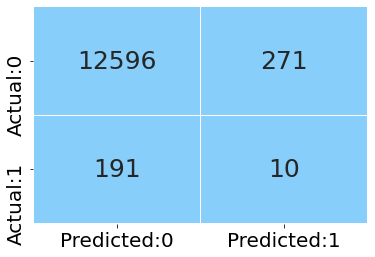

In [156]:
plot_cm(svc,rfe_test)

In [158]:
d = 2*log_loss(ytest,pred_svc,normalize = True)

print('Deviance of the model is ', round(d,4))

Deviance of the model is  2.4422


In [159]:
## ROC curve can't be plotted; SVC doesn't seem to perform either.

### Further trying to build better stacked models

In [160]:
base_learners2 = [('rf2', RandomForestClassifier(criterion = 'entropy', max_depth = 10, max_features = 'sqrt', 
                                                     max_leaf_nodes = 8, min_samples_leaf = 5, min_samples_split = 2, 
                                                     n_estimators = 50, random_state = 10,oob_score = True, n_jobs = -1,bootstrap = True)),
                 ('knn', KNeighborsClassifier(n_neighbors = 17, metric = 'euclidean')),
                 ('lg' , LogisticRegression())]

stack_model2 = StackingClassifier(estimators = base_learners2, final_estimator = GaussianNB())


stack_model2.fit(rfe_train,ytrain_samp)

StackingClassifier(estimators=[('rf2',
                                RandomForestClassifier(criterion='entropy',
                                                       max_depth=10,
                                                       max_features='sqrt',
                                                       max_leaf_nodes=8,
                                                       min_samples_leaf=5,
                                                       n_estimators=50,
                                                       n_jobs=-1,
                                                       oob_score=True,
                                                       random_state=10)),
                               ('knn',
                                KNeighborsClassifier(metric='euclidean',
                                                     n_neighbors=17)),
                               ('lg', LogisticRegression())],
                   final_estimator=GaussianNB())

In [161]:
pred_stack2 = stack_model2.predict(rfe_test)

In [162]:
print(classification_report(ytest,pred_stack2))

              precision    recall  f1-score   support

           0       0.99      0.90      0.94     12867
           1       0.07      0.44      0.11       201

    accuracy                           0.89     13068
   macro avg       0.53      0.67      0.53     13068
weighted avg       0.98      0.89      0.93     13068



In [163]:
print('Cohen-Kappa Score is ', cohen_kappa_score(ytest,pred_stack2))

Cohen-Kappa Score is  0.09017502028712554


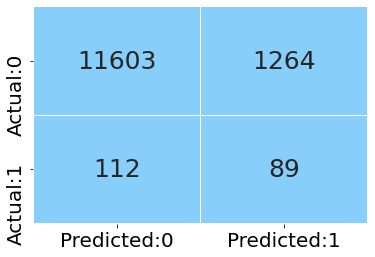

In [164]:
plot_cm(stack_model2,rfe_test)

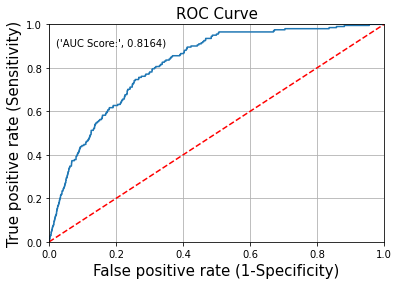

In [165]:
roc(stack_model2,rfe_test)

In [166]:
d = 2*log_loss(ytest,pred_stack2,normalize = True)

print('Deviance of the model is ', round(d,4))

Deviance of the model is  7.2737


In [167]:
## Reordering base learners have no effect.
## Trying Stacking with all the features.

In [169]:
base_learners3 = [('lg' , LogisticRegression()),
                  ('rf2', RandomForestClassifier(criterion = 'entropy', max_depth = 10, max_features = 'sqrt', 
                                                     max_leaf_nodes = 8, min_samples_leaf = 5, min_samples_split = 2, 
                                                     n_estimators = 50, random_state = 10,oob_score = True, n_jobs = -1,bootstrap = True)),
                 ('knn', KNeighborsClassifier(n_neighbors = 17, metric = 'euclidean'))]

stack_model3 = StackingClassifier(estimators = base_learners3, final_estimator = GaussianNB())


stack_model3.fit(xtrain_samp,ytrain_samp)

StackingClassifier(estimators=[('lg', LogisticRegression()),
                               ('rf2',
                                RandomForestClassifier(criterion='entropy',
                                                       max_depth=10,
                                                       max_features='sqrt',
                                                       max_leaf_nodes=8,
                                                       min_samples_leaf=5,
                                                       n_estimators=50,
                                                       n_jobs=-1,
                                                       oob_score=True,
                                                       random_state=10)),
                               ('knn',
                                KNeighborsClassifier(metric='euclidean',
                                                     n_neighbors=17))],
                   final_estimator=GaussianNB())

In [170]:
pred_stack3 = stack_model3.predict(xtest_final)

In [171]:
print(classification_report(ytest,pred_stack3))

              precision    recall  f1-score   support

           0       0.99      0.92      0.95     12867
           1       0.07      0.37      0.11       201

    accuracy                           0.91     13068
   macro avg       0.53      0.64      0.53     13068
weighted avg       0.98      0.91      0.94     13068



In [172]:
print('Cohen-Kappa Score is ', cohen_kappa_score(ytest,pred_stack3))

Cohen-Kappa Score is  0.08665129629420987


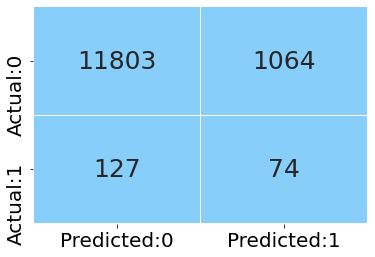

In [173]:
plot_cm(stack_model3,xtest_final)

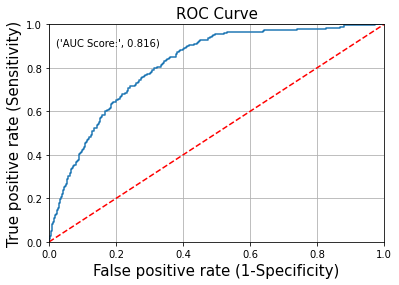

In [174]:
roc(stack_model3,xtest_final)

In [175]:
d = 2*log_loss(ytest,pred_stack3,normalize = True)

print('Deviance of the model is ', round(d,4))

Deviance of the model is  6.2958


In [176]:
## Recall has reuced by 7 percentage points if model built on all the features; Better to go with RFE features.

#### Checking for Balanced models now.

In [183]:
base_learners4 = [('lg' , LogisticRegression(class_weight = 'balanced')),
                  ('rf2', RandomForestClassifier(criterion = 'entropy',class_weight = 'balanced', max_depth = 10, max_features = 'sqrt', 
                                                     max_leaf_nodes = 8, min_samples_leaf = 5, min_samples_split = 2, 
                                                     n_estimators = 50, random_state = 10,oob_score = True, n_jobs = -1,bootstrap = True)),
                  ('svc',SVC(class_weight = 'balanced')),
                 ('knn', KNeighborsClassifier(n_neighbors = 17, metric = 'euclidean'))]

stack_model4 = StackingClassifier(estimators = base_learners4, final_estimator = GaussianNB())


stack_model4.fit(xtrain_final,ytrain)

StackingClassifier(estimators=[('lg',
                                LogisticRegression(class_weight='balanced')),
                               ('rf2',
                                RandomForestClassifier(class_weight='balanced',
                                                       criterion='entropy',
                                                       max_depth=10,
                                                       max_features='sqrt',
                                                       max_leaf_nodes=8,
                                                       min_samples_leaf=5,
                                                       n_estimators=50,
                                                       n_jobs=-1,
                                                       oob_score=True,
                                                       random_state=10)),
                               ('svc', SVC(class_weight='balanced')),
                               ('knn',
    

In [184]:
pred_stack4 = stack_model4.predict(xtest_final)

In [185]:
print(classification_report(ytest,pred_stack4))

              precision    recall  f1-score   support

           0       0.99      0.94      0.97     12867
           1       0.06      0.23      0.10       201

    accuracy                           0.93     13068
   macro avg       0.52      0.59      0.53     13068
weighted avg       0.97      0.93      0.95     13068



In [186]:
print('Cohen-Kappa Score is ', cohen_kappa_score(ytest,pred_stack4))

Cohen-Kappa Score is  0.07444102211433956


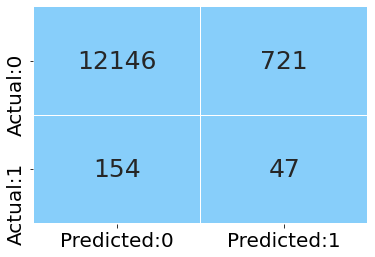

In [187]:
plot_cm(stack_model4,xtest_final)

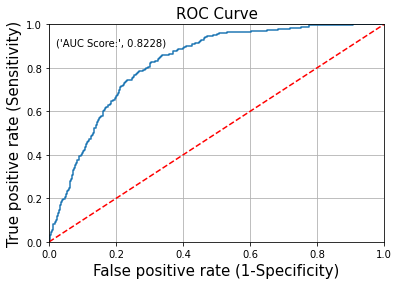

In [188]:
roc(stack_model4,xtest_final)

In [189]:
d = 2*log_loss(ytest,pred_stack4,normalize = True)

print('Deviance of the model is ', round(d,4))

Deviance of the model is  4.6253


#### Fine tuning above model via re-ordering learners and better data preprocessing

In [190]:
xtrain_final.shape

(52270, 40)

In [191]:
xtest_final.shape

(13068, 40)

In [192]:
xtrain_final.head()

,Gender,Contacted,Primary_Bank_Type,City_Category_B,City_Category_C,Employer_Category1_B,Employer_Category1_C,Source_Category_B,Source_Category_C,Source_Category_D,Source_Category_E,Source_Category_F,Source_Category_G,Age_Cat_Middle-Aged,Age_Cat_Old,Age_Cat_Young,Employer_Cat3_MSF,Employer_Cat3_MSME,Employer_Cat3_PVT,Employer_Cat3_VSF,Employer_Category2,Var1,Lead_Creation_Month,City_Code,Source,Monthly_Income,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,loan_period_months,emi_recal,EMI-Monthly_Income_Ratio,Income_loan_Ratio,IR_15-20,IR_20-25,IR_25+,Q2,Q3,Q4
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,4,0,7,0.148588,0.059791,1680.0,0.0,19600,3.0,18.040,40.8,646,0.384524,0.879263,1,0,0,0,0,1
1,1,1,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,4,2,5,-0.267721,0.059791,1350.0,0.0,30000,5.0,20.000,60.0,795,0.588889,1.597424,1,0,0,0,1,0
2,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,1,10,7,0.148588,0.059791,5200.0,0.0,90000,4.0,15.108,52.8,2344,0.450769,1.266409,1,0,0,0,0,1
3,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,4,0,12,-0.267721,-0.279869,1500.0,0.0,22000,4.0,35.500,48.0,864,0.576000,1.085929,0,0,1,0,0,0
4,1,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,4,2,7,0.034822,0.059791,1500.0,600.0,11000,5.0,20.000,60.0,291,0.594000,0.527150,1,0,0,0,0,1


In [193]:
xtest_final.head()

,Gender,Contacted,Primary_Bank_Type,City_Category_B,City_Category_C,Employer_Category1_B,Employer_Category1_C,Source_Category_B,Source_Category_C,Source_Category_D,Source_Category_E,Source_Category_F,Source_Category_G,Age_Cat_Middle-Aged,Age_Cat_Old,Age_Cat_Young,Employer_Cat3_MSF,Employer_Cat3_MSME,Employer_Cat3_PVT,Employer_Cat3_VSF,Employer_Category2,Var1,Lead_Creation_Month,City_Code,Source,Monthly_Income,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,loan_period_months,emi_recal,EMI-Monthly_Income_Ratio,Income_loan_Ratio,IR_15-20,IR_20-25,IR_25+,Q2,Q3,Q4
0,1,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,4,7,7,0.034822,0.059791,3550.0,0.0,57000,5.0,14.264,60.0,1334,0.375775,1.154195,0,0,0,0,0,1
1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,4,0,8,0.148588,0.059791,1000.0,0.0,27000,5.0,18.950,57.6,717,0.717000,1.952378,1,0,0,0,0,1
2,1,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,4,10,4,0.034822,-0.279869,8000.0,0.0,139000,5.0,14.850,60.0,3296,0.412000,1.248986,0,0,0,0,1,0
3,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,4,7,12,-0.267721,0.059791,2800.0,900.0,10000,2.0,20.000,24.0,509,0.503214,0.280534,1,0,0,0,0,0
4,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,4,0,8,-0.267721,0.059791,2625.0,1000.0,18600,4.0,20.800,48.0,574,0.599619,0.524630,0,1,0,0,0,1


##### Using PT and SC

In [194]:
req_train = xtrain_final.iloc[:,25:34]
req_test = xtest_final.iloc[:,25:34]

rest_train1 = xtrain_final.iloc[:,:25].reset_index(drop = True)
rest_train2 = xtrain_final.iloc[:,34:].reset_index(drop = True)

rest_test1 = xtest_final.iloc[:,:25].reset_index(drop = True)
rest_test2 = xtest_final.iloc[:,34:].reset_index(drop = True)

rest_train = pd.concat([rest_train1,rest_train2], axis = 1)
rest_test = pd.concat([rest_test1,rest_test2], axis = 1)

In [195]:
rest_train = rest_train.reset_index(drop = True)
rest_test = rest_test.reset_index(drop = True)

In [197]:
pt = PowerTransformer()

x1 = pt.fit_transform(req_train)

pt_train1 = pd.DataFrame(x1,columns = req_train.columns)

In [198]:
y1 = pt.transform(req_test)

pt_test1 = pd.DataFrame(y1,columns = req_test.columns)

In [199]:
sc = StandardScaler()

x2 = sc.fit_transform(pt_train1)

sc_train = pd.DataFrame(x2,columns = pt_train1.columns)

In [200]:
y2 = sc.transform(pt_test1)

sc_test = pd.DataFrame(y2, columns = pt_test1.columns)

In [201]:
sc_train = sc_train.reset_index(drop = True)
sc_test = sc_test.reset_index(drop = True)

In [202]:
balanced_train = pd.concat([sc_train,rest_train], axis = 1)
balanced_test = pd.concat([sc_test,rest_test], axis = 1)

In [203]:
balanced_train.head()

,Monthly_Income,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,loan_period_months,emi_recal,EMI-Monthly_Income_Ratio,Income_loan_Ratio,Gender,Contacted,Primary_Bank_Type,City_Category_B,City_Category_C,Employer_Category1_B,Employer_Category1_C,Source_Category_B,Source_Category_C,Source_Category_D,Source_Category_E,Source_Category_F,Source_Category_G,Age_Cat_Middle-Aged,Age_Cat_Old,Age_Cat_Young,Employer_Cat3_MSF,Employer_Cat3_MSME,Employer_Cat3_PVT,Employer_Cat3_VSF,Employer_Category2,Var1,Lead_Creation_Month,City_Code,Source,IR_15-20,IR_20-25,IR_25+,Q2,Q3,Q4
0,-0.589984,-0.723276,0.0,-1.018909,-0.152938,-0.684416,-0.569617,-0.429738,0.101875,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,4,0,7,0.148588,0.059791,1,0,0,0,0,1
1,-0.879450,-0.723276,0.0,1.145998,0.256979,1.180651,-0.201832,0.532850,1.169556,1,1,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,4,2,5,-0.267721,0.059791,1,0,0,0,1,0
2,0.890109,-0.723276,0.0,-0.097130,-1.021790,0.389388,1.605284,-0.083905,0.750505,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,1,10,7,0.148588,0.059791,1,0,0,0,0,1
3,-0.739870,-0.723276,0.0,-0.097130,1.667303,-0.076523,-0.056283,0.480474,0.474123,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,4,0,12,-0.267721,-0.279869,0,0,1,0,0,0
4,-0.739870,1.381261,0.0,1.145998,0.256979,1.180651,-2.048837,0.553354,-0.728673,1,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,4,2,7,0.034822,0.059791,1,0,0,0,0,1


In [204]:
balanced_train.shape

(52270, 40)

In [205]:
balanced_test.head()

,Monthly_Income,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,loan_period_months,emi_recal,EMI-Monthly_Income_Ratio,Income_loan_Ratio,Gender,Contacted,Primary_Bank_Type,City_Category_B,City_Category_C,Employer_Category1_B,Employer_Category1_C,Source_Category_B,Source_Category_C,Source_Category_D,Source_Category_E,Source_Category_F,Source_Category_G,Age_Cat_Middle-Aged,Age_Cat_Old,Age_Cat_Young,Employer_Cat3_MSF,Employer_Cat3_MSME,Employer_Cat3_PVT,Employer_Cat3_VSF,Employer_Category2,Var1,Lead_Creation_Month,City_Code,Source,IR_15-20,IR_20-25,IR_25+,Q2,Q3,Q4
0,0.392982,-0.723276,0.0,1.145998,-1.355280,1.180651,0.685595,-0.478249,0.583380,1,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,4,7,7,0.034822,0.059791,0,0,0,0,0,1
1,-1.278238,-0.723276,0.0,1.145998,0.050500,0.904489,-0.383961,1.005239,1.526885,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,4,0,8,0.148588,0.059791,1,0,0,0,0,1
2,1.447586,-0.723276,0.0,1.145998,-1.118810,1.180651,2.138697,-0.281824,0.725505,1,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,4,10,4,0.034822,-0.279869,0,0,0,0,1,0
3,0.082398,1.421026,0.0,-1.652945,0.256979,-1.690196,-1.000643,0.165456,-1.540037,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,4,7,12,-0.267721,0.059791,1,0,0,0,0,0
4,-0.002260,1.430573,0.0,-0.097130,0.397040,-0.076523,-0.782147,0.575723,-0.735802,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,4,0,8,-0.267721,0.059791,0,1,0,0,0,1


In [206]:
balanced_test.shape

(13068, 40)

#### Selecting RFE Features for Stacking

In [207]:
balanced_rfe_train = balanced_train.loc[:,['Source_Category_B', 'Source_Category_G', 'Employer_Cat3_MSF',
       'Employer_Cat3_MSME', 'Employer_Cat3_VSF', 'Employer_Category2', 'Var1',
       'Lead_Creation_Month', 'City_Code', 'Source', 'Monthly_Income',
       'Existing_EMI', 'Loan_Amount', 'Loan_Period', 'Interest_Rate',
       'loan_period_months', 'emi_recal', 'EMI-Monthly_Income_Ratio',
       'Income_loan_Ratio', 'IR_15-20']]

balanced_rfe_test = balanced_test.loc[:,['Source_Category_B', 'Source_Category_G', 'Employer_Cat3_MSF',
       'Employer_Cat3_MSME', 'Employer_Cat3_VSF', 'Employer_Category2', 'Var1',
       'Lead_Creation_Month', 'City_Code', 'Source', 'Monthly_Income',
       'Existing_EMI', 'Loan_Amount', 'Loan_Period', 'Interest_Rate',
       'loan_period_months', 'emi_recal', 'EMI-Monthly_Income_Ratio',
       'Income_loan_Ratio', 'IR_15-20']]

In [208]:
base_learners5 = [('rf2', RandomForestClassifier(criterion = 'entropy',class_weight = 'balanced', max_depth = 10, max_features = 'sqrt', 
                                                     max_leaf_nodes = 8, min_samples_leaf = 5, min_samples_split = 2, 
                                                     n_estimators = 50, random_state = 10,oob_score = True, n_jobs = -1,bootstrap = True)),
                  ('svc',SVC(class_weight = 'balanced')),
                 ('knn', KNeighborsClassifier(n_neighbors = 17, metric = 'euclidean')),
                 ('gnb',GaussianNB())]

stack_model5 = StackingClassifier(estimators = base_learners5, final_estimator = LogisticRegression(class_weight = 'balanced'))


stack_model5.fit(balanced_rfe_train,ytrain)

StackingClassifier(estimators=[('rf2',
                                RandomForestClassifier(class_weight='balanced',
                                                       criterion='entropy',
                                                       max_depth=10,
                                                       max_features='sqrt',
                                                       max_leaf_nodes=8,
                                                       min_samples_leaf=5,
                                                       n_estimators=50,
                                                       n_jobs=-1,
                                                       oob_score=True,
                                                       random_state=10)),
                               ('svc', SVC(class_weight='balanced')),
                               ('knn',
                                KNeighborsClassifier(metric='euclidean',
                                               

In [209]:
pred_stack5 = stack_model5.predict(balanced_rfe_test)

In [210]:
print(classification_report(ytest,pred_stack5))

              precision    recall  f1-score   support

           0       1.00      0.65      0.79     12867
           1       0.04      0.88      0.07       201

    accuracy                           0.66     13068
   macro avg       0.52      0.76      0.43     13068
weighted avg       0.98      0.66      0.78     13068



In [211]:
print('Cohen-Kappa Score is ', cohen_kappa_score(ytest,pred_stack5))

Cohen-Kappa Score is  0.04457209963126896


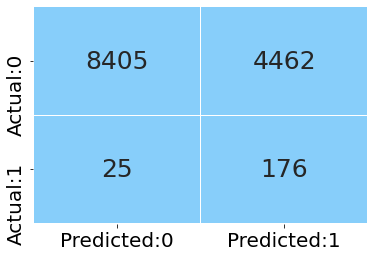

In [212]:
plot_cm(stack_model5,balanced_rfe_test)

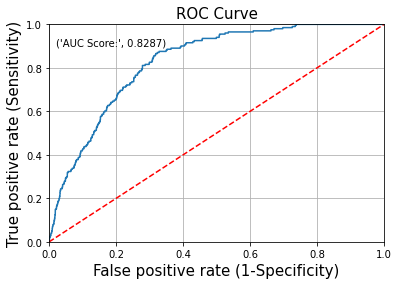

In [213]:
roc(stack_model5,balanced_rfe_test)

In [214]:
d = 2*log_loss(ytest,pred_stack5,normalize = True)

print('Deviance of the model is ', round(d,4))

Deviance of the model is  23.7189


#### Cross validation of Stack_Model5

In [217]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

In [218]:
cv = RepeatedStratifiedsKFold(n_splits = 10, n_repeats = 3, random_state = 10)

score = cross_val_score(estimator = stack_model5, X = balanced_rfe_train, y = ytrain,scoring = 'accuracy' ,cv = cv )
print('Mean Validation Accuracy is ',score.mean())

KeyboardInterrupt: 